In [1]:
#2

In [2]:
#add patch
from PIL import Image, ImageDraw

def add_patch_to_image(image_path, output_path, patch_size=(199, 199)):
    image = Image.open('/Users/vashisth/Documents/GitHub/trustworthy-ai-challenge/TrustworthyAI Challenge2/stopsign.jpg')
    draw = ImageDraw.Draw(image)
    x = 310
    y = 310
    patch_width, patch_height = patch_size
    patch_coordinates = [x- (0.5*patch_width), y- (0.5*patch_height), x + (0.5*patch_width), y + (0.5*patch_height)]
    
    draw.rectangle(patch_coordinates, fill='yellow')
    image.save(output_path)

add_patch_to_image('stopsign.jpg', 'modified_stopsign_vash.jpg')

In [3]:
#2 # change the rotation angle and the size of the patch

In [4]:
from PIL import Image, ImageDraw
import math

def add_rotated_patch_to_image(image_path, output_path, patch_size=(200, 200), patch_position=(310, 310), rotation_angle=45):
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)
    half_width, half_height = patch_size[0] / 2, patch_size[1] / 2
    center_x, center_y = patch_position
    corners = [
        (center_x - half_width, center_y - half_height),  # Top left
        (center_x + half_width, center_y - half_height),  # Top right
        (center_x + half_width, center_y + half_height),  # Bottom right
        (center_x - half_width, center_y + half_height)   # Bottom left
    ]
    def rotate_point(x, y, cx, cy, angle):
        radians = math.radians(angle)
        cos = math.cos(radians)
        sin = math.sin(radians)
        nx = cos * (x - cx) - sin * (y - cy) + cx
        ny = sin * (x - cx) + cos * (y - cy) + cy
        return nx, ny
    rotated_corners = [rotate_point(x, y, center_x, center_y, rotation_angle) for x, y in corners]
    draw.polygon(rotated_corners, fill='yellow')
    image.save(output_path)

add_rotated_patch_to_image('stopsign.jpg', 'stopsign_199x199_vash.jpg', patch_size=(199, 199), rotation_angle=0)
add_rotated_patch_to_image('stopsign.jpg', 'stopsign_100x100_0rot_vash.jpg', patch_size=(100, 100), rotation_angle=0)
add_rotated_patch_to_image('stopsign.jpg', 'stopsign_199x199_45rot_vash.jpg', patch_size=(199, 199), rotation_angle=45)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

---
# Part A

## RCNN

```
Command: python scripts/run.py --mode=eval --agent_cfg faster_rcnn.yaml --scenario_cfg object_detection_stopsign.yaml --num_scenario 4 

```

In [17]:

#Command: python scripts/run.py --mode=eval --agent_cfg faster_rcnn.yaml --scenario_cfg object_detection_stopsign.yaml --num_scenario 4 
print("agent:faster_rcnn, object_detection_stopsign, num_scenario 4")
mean_iou =          [0.36466291579571397, 0.4291274048711943, 0.6085177491540494, 0.5817842483520508]

mAP_evaluate =            [0.08351726699329447, 0.2560554951429367, 0.37596322521567344, 0.3454888127744198]
print(f"mean_iou:{mean_iou}")
print(f"Mean of mean_iou:{np.mean(mean_iou)}")
print(f"Stdev of mean_iou:{np.std(mean_iou)}")
print(f"mAP_evaluate:{mAP_evaluate}")
print(f"Mean of mAP_evaluate:{np.mean(mAP_evaluate)}")
print(f"Stdev of mAP_evaluate:{np.std(mAP_evaluate)}")


mean_iou_mean = np.mean(mean_iou)
mAP_evaluate_mean = np.mean(mAP_evaluate)
std_map_evaluate = np.std(mAP_evaluate)

agent:faster_rcnn, object_detection_stopsign, num_scenario 4
mean_iou:[0.36466291579571397, 0.4291274048711943, 0.6085177491540494, 0.5817842483520508]
Mean of mean_iou:0.4960230795432521
Stdev of mean_iou:0.10215252404603561
mAP_evaluate:[0.08351726699329447, 0.2560554951429367, 0.37596322521567344, 0.3454888127744198]
Mean of mAP_evaluate:0.2652562000315811
Stdev of mAP_evaluate:0.11380576690681841


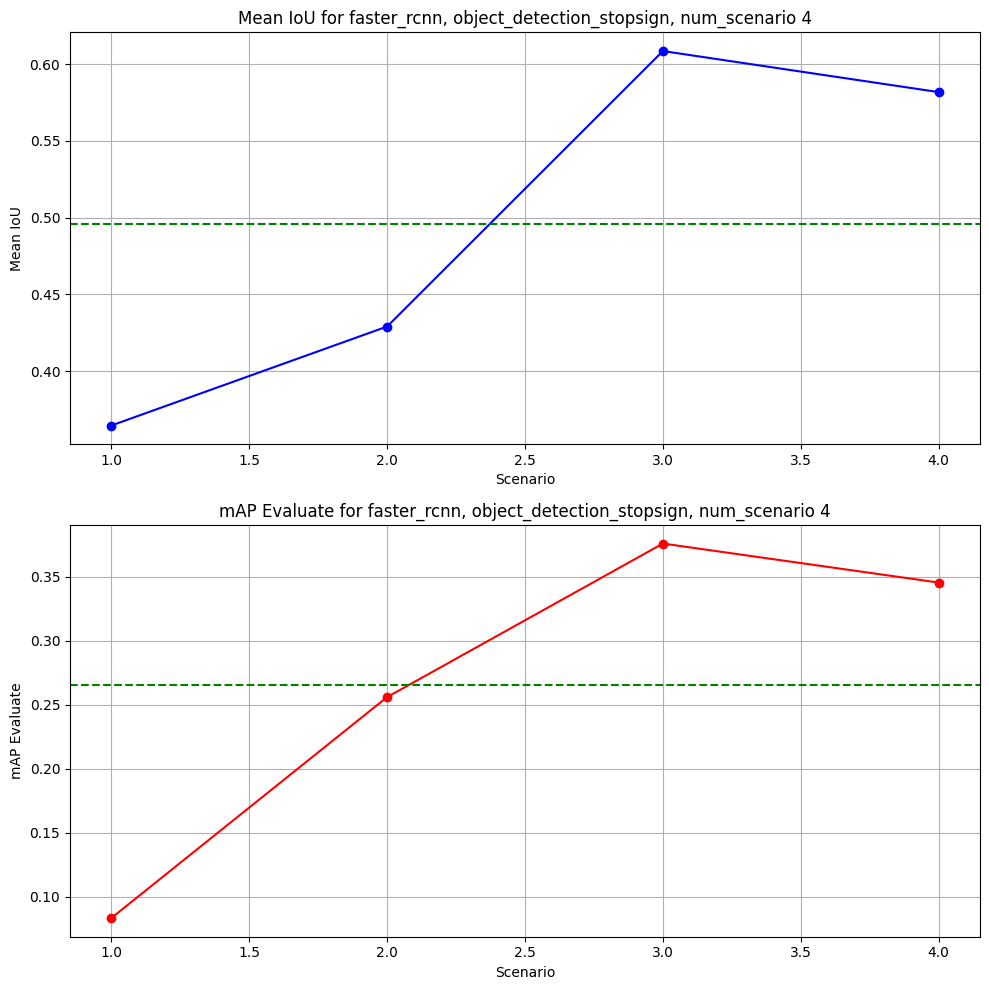

--------------------------------


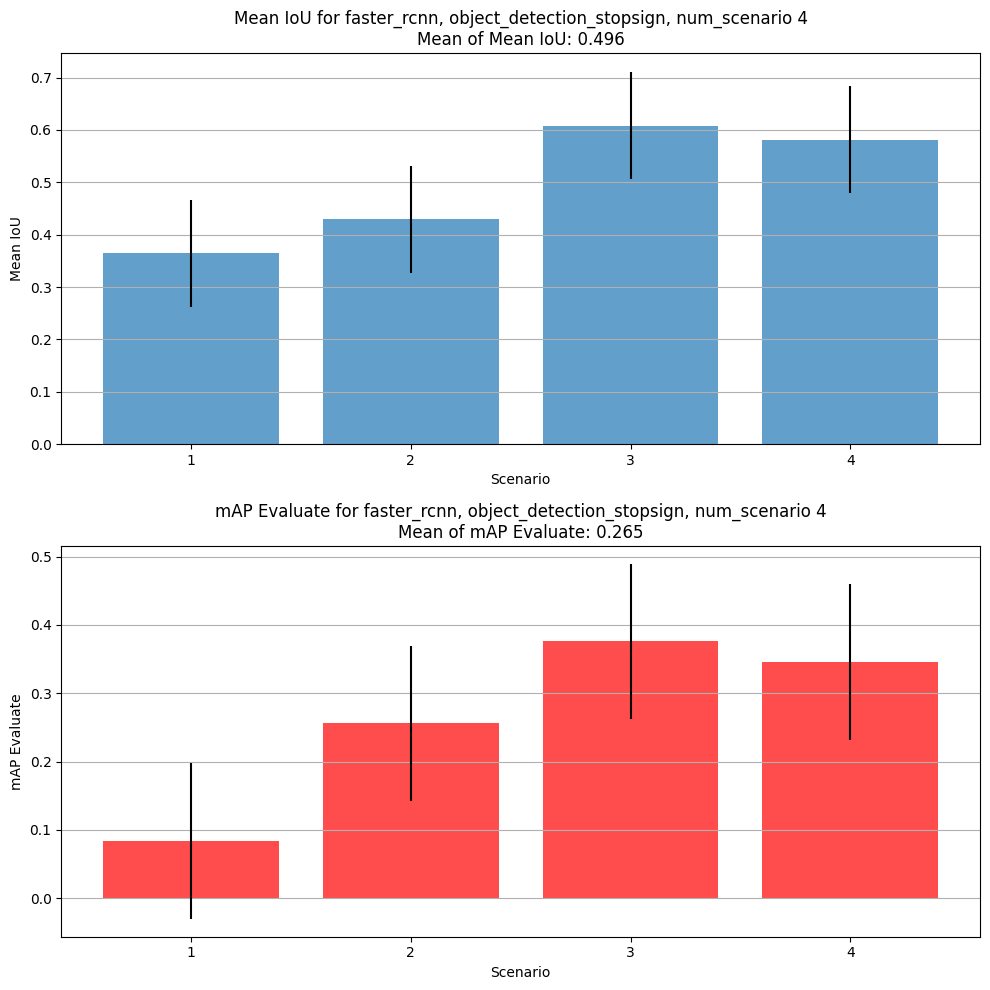

In [18]:
# Plotting the means as horizontal dashed lines
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting mean_iou with its mean
axs[0].plot(range(1, len(mean_iou) + 1), mean_iou, marker='o', linestyle='-', color='b')
axs[0].axhline(y=mean_iou_mean, color='g', linestyle='--')
axs[0].set_title('Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].grid(True)

# Plotting mAP_evaluate with its mean
axs[1].plot(range(1, len(mAP_evaluate) + 1), mAP_evaluate, marker='o', linestyle='-', color='r')
axs[1].axhline(y=mAP_evaluate_mean, color='g', linestyle='--')
axs[1].set_title('mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].grid(True)

plt.tight_layout()
plt.show()

print('--------------------------------')
mean_iou_mean = np.mean(mean_iou)
mean_iou_std = np.std(mean_iou)
mAP_evaluate_mean_rcnn_1 = np.mean(mAP_evaluate)
mAP_evaluate_std_rcnn_1  = np.std(mAP_evaluate)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Bar plot for mean_iou with std as error bars
axs[0].bar(range(1, len(mean_iou) + 1), mean_iou, yerr=mean_iou_std, alpha=0.7)
axs[0].set_title(f'Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of Mean IoU: {mean_iou_mean:.3f}')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].set_xticks(range(1, len(mean_iou) + 1))
axs[0].grid(True, axis='y')

# Bar plot for mAP_evaluate with std as error bars
axs[1].bar(range(1, len(mAP_evaluate) + 1), mAP_evaluate, yerr=mAP_evaluate_std_rcnn_1, color='r', alpha=0.7)
axs[1].set_title(f'mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of mAP Evaluate: {mAP_evaluate_mean_rcnn_1:.3f}')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].set_xticks(range(1, len(mAP_evaluate) + 1))
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

```

#Command: python scripts/run.py --mode=eval --agent_cfg faster_rcnn.yaml --scenario_cfg object_detection_stopsign_1.yaml --num_scenario 4 
```

In [19]:
#Command: python scripts/run.py --mode=eval --agent_cfg faster_rcnn.yaml --scenario_cfg object_detection_stopsign_1.yaml --num_scenario 4 
print("agent:faster_rcnn, object_detection_stopsign_1, num_scenario 4")
mean_iou          =       [0.35017146186514214, 0.39835596538108325, 0.4397299341533495, 0.41196413467759674]
mAP_evaluate       =      [0.0666943510674173, 0.18094001710414886, 0.239803974237293, 0.1841487942263484]
print(f"mean_iou:{mean_iou}")
print(f"Mean of mean_iou:{np.mean(mean_iou)}")
print(f"Stdev of mean_iou:{np.std(mean_iou)}")
print(f"mAP_evaluate:{mAP_evaluate}")
print(f"Mean of mAP_evaluate:{np.mean(mAP_evaluate)}")
print(f"Stdev of mAP_evaluate:{np.std(mAP_evaluate)}")

mean_iou_mean = np.mean(mean_iou)
mAP_evaluate_mean = np.mean(mAP_evaluate)

agent:faster_rcnn, object_detection_stopsign_1, num_scenario 4
mean_iou:[0.35017146186514214, 0.39835596538108325, 0.4397299341533495, 0.41196413467759674]
Mean of mean_iou:0.4000553740192929
Stdev of mean_iou:0.03243139676212809
mAP_evaluate:[0.0666943510674173, 0.18094001710414886, 0.239803974237293, 0.1841487942263484]
Mean of mAP_evaluate:0.16789678415880188
Stdev of mAP_evaluate:0.06294209681425984


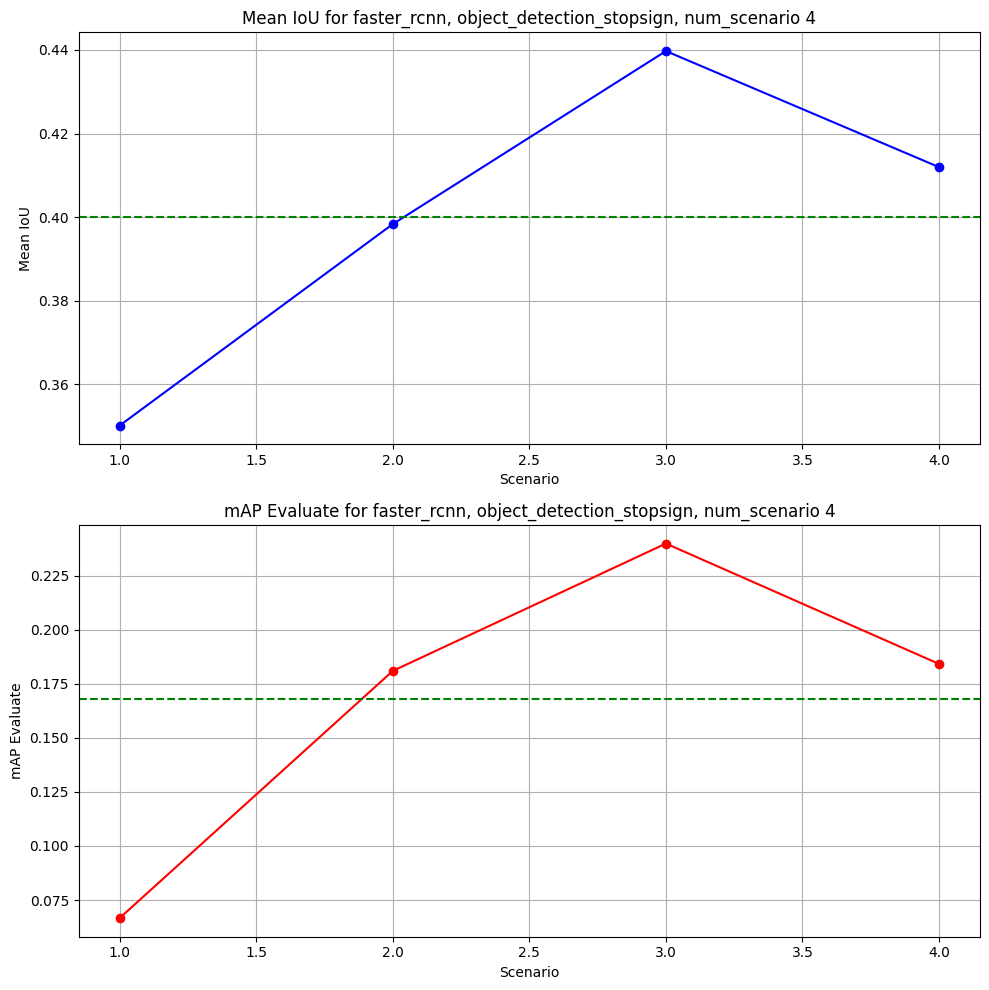

--------------------------------


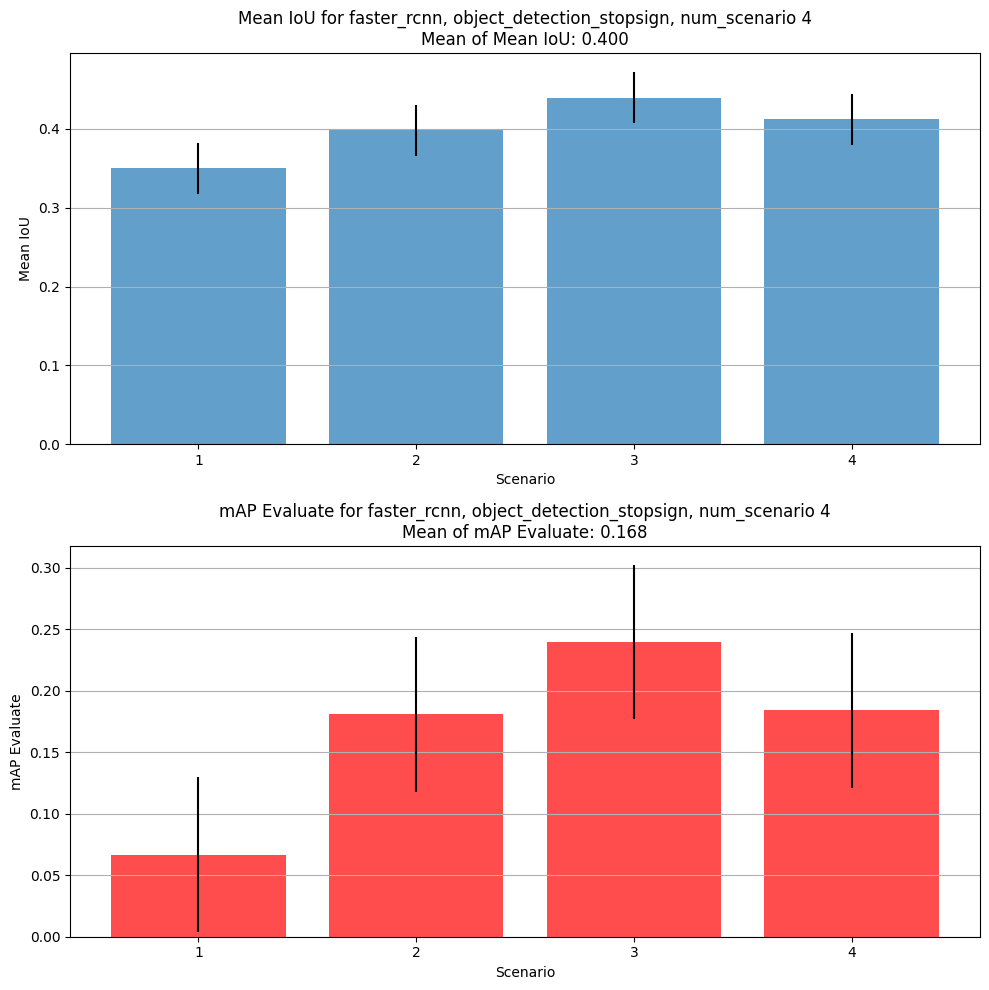

In [20]:
# Plotting the means as horizontal dashed lines
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting mean_iou with its mean
axs[0].plot(range(1, len(mean_iou) + 1), mean_iou, marker='o', linestyle='-', color='b')
axs[0].axhline(y=mean_iou_mean, color='g', linestyle='--')
axs[0].set_title('Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].grid(True)

# Plotting mAP_evaluate with its mean
axs[1].plot(range(1, len(mAP_evaluate) + 1), mAP_evaluate, marker='o', linestyle='-', color='r')
axs[1].axhline(y=mAP_evaluate_mean, color='g', linestyle='--')
axs[1].set_title('mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].grid(True)

plt.tight_layout()
plt.show()

print('--------------------------------')
mean_iou_mean = np.mean(mean_iou)
mean_iou_std = np.std(mean_iou)
mAP_evaluate_mean_rcnn_1 = np.mean(mAP_evaluate)
mAP_evaluate_std_rcnn_1  = np.std(mAP_evaluate)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Bar plot for mean_iou with std as error bars
axs[0].bar(range(1, len(mean_iou) + 1), mean_iou, yerr=mean_iou_std, alpha=0.7)
axs[0].set_title(f'Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of Mean IoU: {mean_iou_mean:.3f}')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].set_xticks(range(1, len(mean_iou) + 1))
axs[0].grid(True, axis='y')

# Bar plot for mAP_evaluate with std as error bars
axs[1].bar(range(1, len(mAP_evaluate) + 1), mAP_evaluate, yerr=mAP_evaluate_std_rcnn_1, color='r', alpha=0.7)
axs[1].set_title(f'mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of mAP Evaluate: {mAP_evaluate_mean_rcnn_1:.3f}')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].set_xticks(range(1, len(mAP_evaluate) + 1))
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

```

Command: python scripts/run.py --mode=eval --agent_cfg faster_rcnn.yaml --scenario_cfg object_detection_stopsign_2.yaml --num_scenario 4 
```

In [21]:
print("agent:faster_rcnn, object_detection_stopsign_2, num_scenario 4")
mean_iou =           [0.3576005965798766, 0.4135083948140559, 0.6723848179630612, 0.46384443990562274]
mAP_evaluate =              [0.013882688782177865, 0.030365514429286124, 0.09233697396703064, 0.05613955529406667]
print(f"mean_iou:{mean_iou}")
print(f"Mean of mean_iou:{np.mean(mean_iou)}")
print(f"Stdev of mean_iou:{np.std(mean_iou)}")
print(f"mAP_evaluate:{mAP_evaluate}")
print(f"Mean of mAP_evaluate:{np.mean(mAP_evaluate)}")
print(f"Stdev of mAP_evaluate:{np.std(mAP_evaluate)}")


mean_iou_mean = np.mean(mean_iou)
mAP_evaluate_mean = np.mean(mAP_evaluate)

agent:faster_rcnn, object_detection_stopsign_2, num_scenario 4
mean_iou:[0.3576005965798766, 0.4135083948140559, 0.6723848179630612, 0.46384443990562274]
Mean of mean_iou:0.4768345623156541
Stdev of mean_iou:0.11899116336887679
mAP_evaluate:[0.013882688782177865, 0.030365514429286124, 0.09233697396703064, 0.05613955529406667]
Mean of mAP_evaluate:0.04818118311814032
Stdev of mAP_evaluate:0.029609349527330776


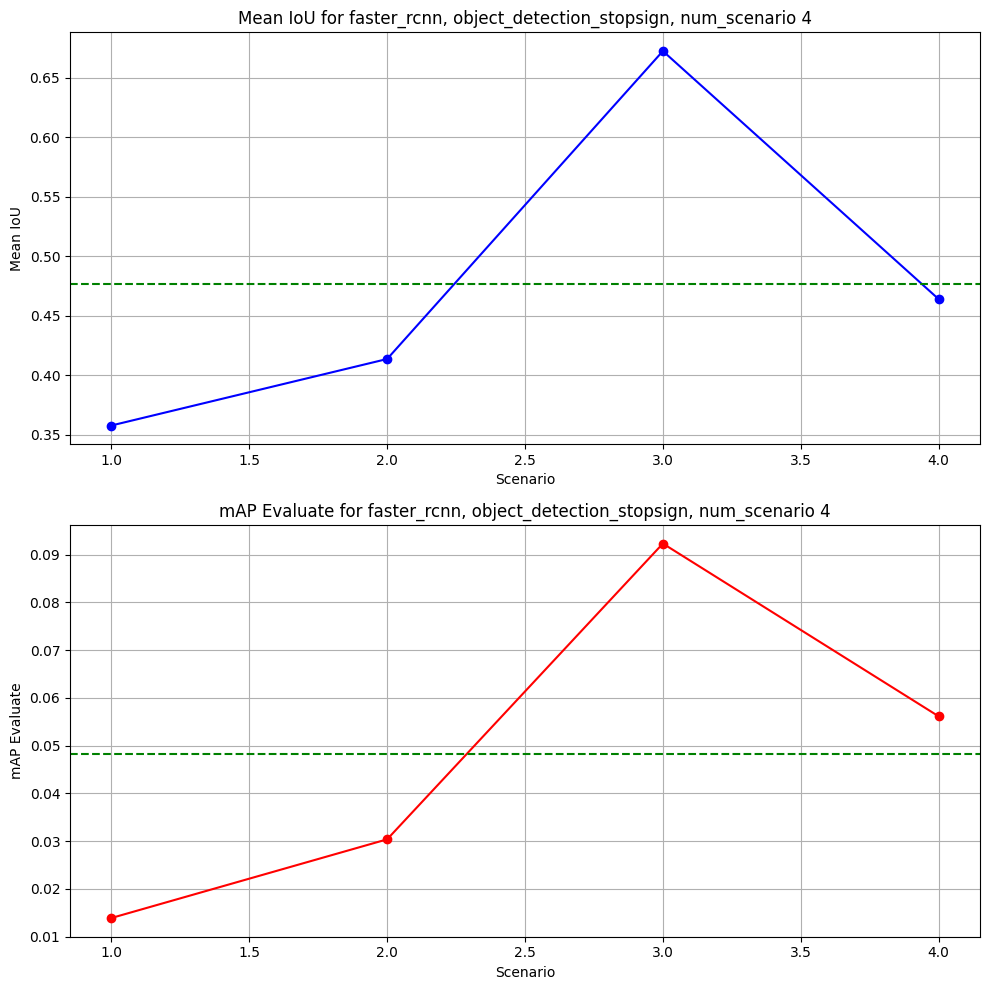

--------------------------------


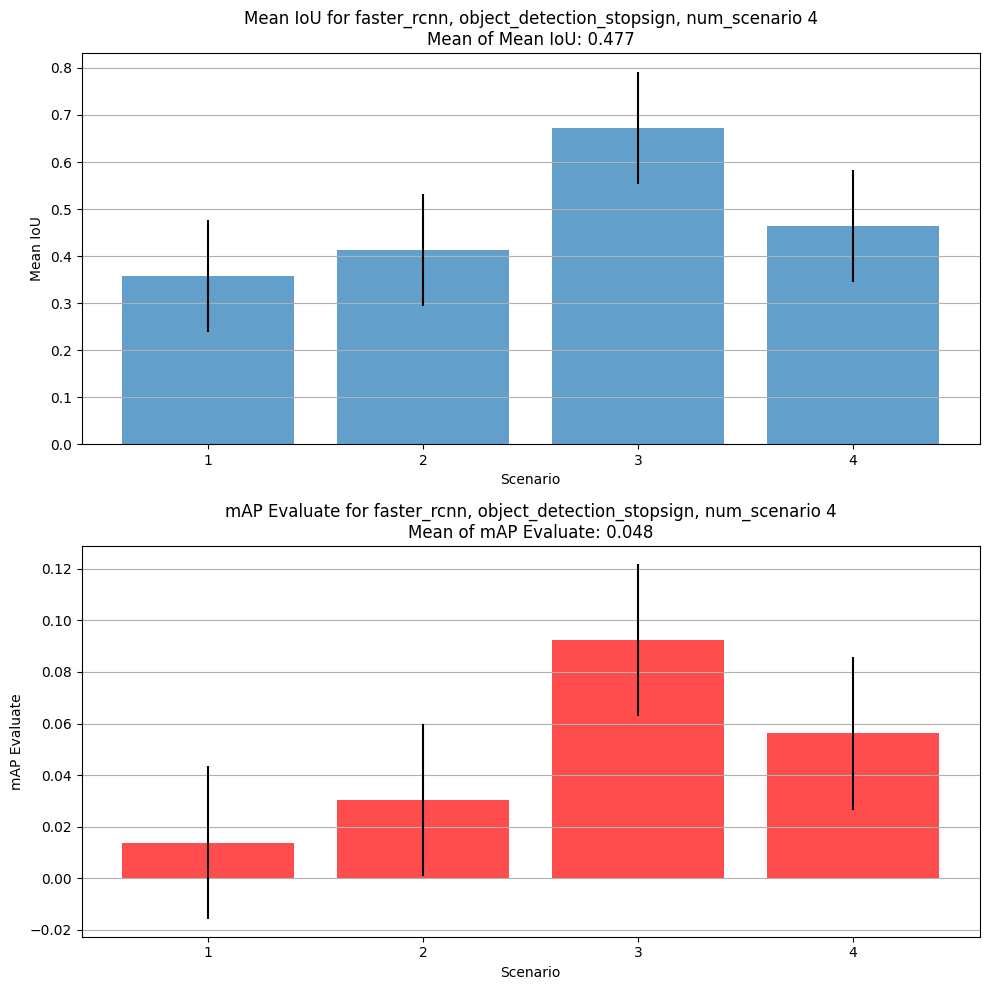

In [22]:
# Plotting the means as horizontal dashed lines
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting mean_iou with its mean
axs[0].plot(range(1, len(mean_iou) + 1), mean_iou, marker='o', linestyle='-', color='b')
axs[0].axhline(y=mean_iou_mean, color='g', linestyle='--')
axs[0].set_title('Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].grid(True)

# Plotting mAP_evaluate with its mean
axs[1].plot(range(1, len(mAP_evaluate) + 1), mAP_evaluate, marker='o', linestyle='-', color='r')
axs[1].axhline(y=mAP_evaluate_mean, color='g', linestyle='--')
axs[1].set_title('mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].grid(True)

plt.tight_layout()
plt.show()

print('--------------------------------')
mean_iou_mean = np.mean(mean_iou)
mean_iou_std = np.std(mean_iou)
mAP_evaluate_mean_rcnn_1 = np.mean(mAP_evaluate)
mAP_evaluate_std_rcnn_1  = np.std(mAP_evaluate)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Bar plot for mean_iou with std as error bars
axs[0].bar(range(1, len(mean_iou) + 1), mean_iou, yerr=mean_iou_std, alpha=0.7)
axs[0].set_title(f'Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of Mean IoU: {mean_iou_mean:.3f}')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].set_xticks(range(1, len(mean_iou) + 1))
axs[0].grid(True, axis='y')

# Bar plot for mAP_evaluate with std as error bars
axs[1].bar(range(1, len(mAP_evaluate) + 1), mAP_evaluate, yerr=mAP_evaluate_std_rcnn_1, color='r', alpha=0.7)
axs[1].set_title(f'mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of mAP Evaluate: {mAP_evaluate_mean_rcnn_1:.3f}')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].set_xticks(range(1, len(mAP_evaluate) + 1))
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

## YOLO
```
Command: python scripts/run.py --mode=eval --agent_cfg yolo.yaml --scenario_cfg object_detection_stopsign.yaml --num_scenario 4 --save_video
```

In [23]:
print("agent:yolo, object_detection_stopsign, num_scenario 4")
mean_iou   =              [0.7480447934224055, 0.836617300691812, 0.8793534597624904, 0.8750739097595215]
mAP_evaluate  =           [0.460545396595262, 0.6465700980275869, 0.7911017287522555, 0.6478678084909916]
print(f"mean_iou:{mean_iou}")
print(f"Mean of mean_iou:{np.mean(mean_iou)}")
print(f"Stdev of mean_iou:{np.std(mean_iou)}")
print(f"mAP_evaluate:{mAP_evaluate}")
print(f"Mean of mAP_evaluate:{np.mean(mAP_evaluate)}")
print(f"Stdev of mAP_evaluate:{np.std(mAP_evaluate)}")


mean_iou_mean = np.mean(mean_iou)
mAP_evaluate_mean = np.mean(mAP_evaluate)


agent:yolo, object_detection_stopsign, num_scenario 4
mean_iou:[0.7480447934224055, 0.836617300691812, 0.8793534597624904, 0.8750739097595215]
Mean of mean_iou:0.8347723659090573
Stdev of mean_iou:0.0527654337129895
mAP_evaluate:[0.460545396595262, 0.6465700980275869, 0.7911017287522555, 0.6478678084909916]
Mean of mAP_evaluate:0.636521257966524
Stdev of mAP_evaluate:0.11735879720868088


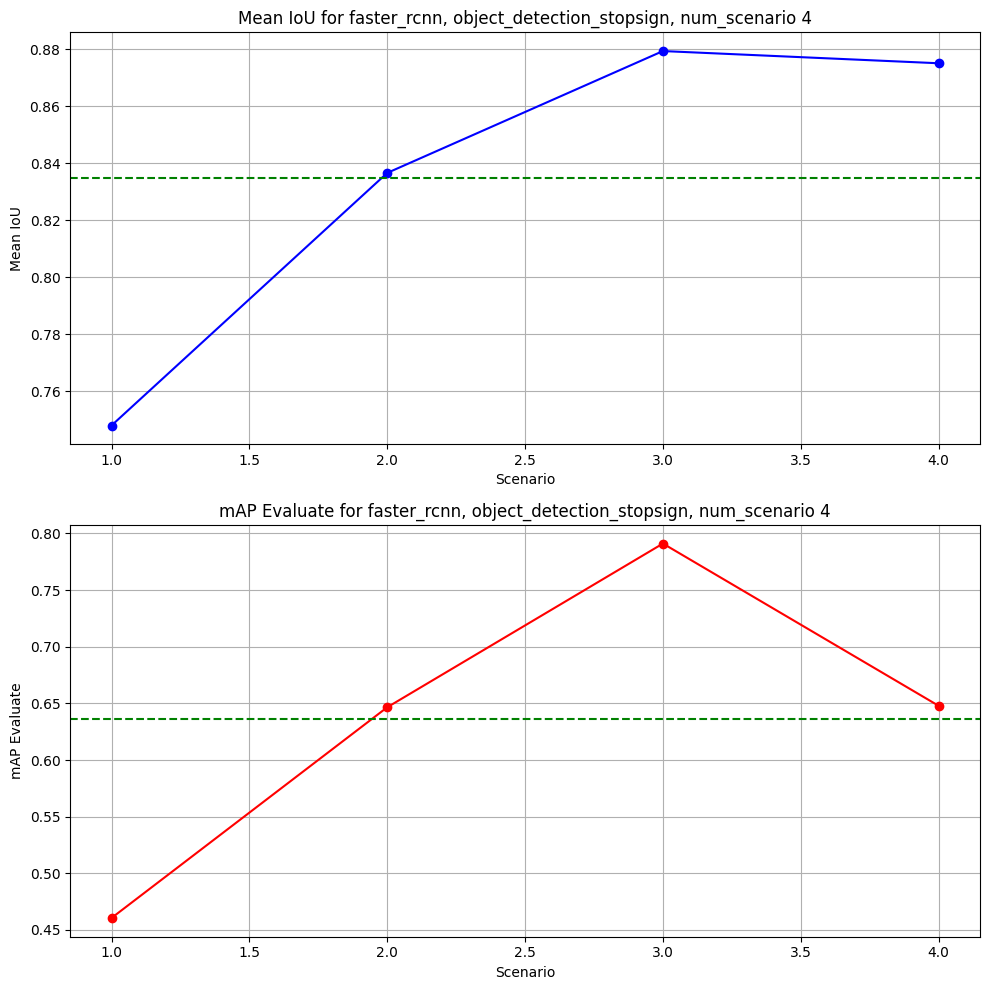

--------------------------------


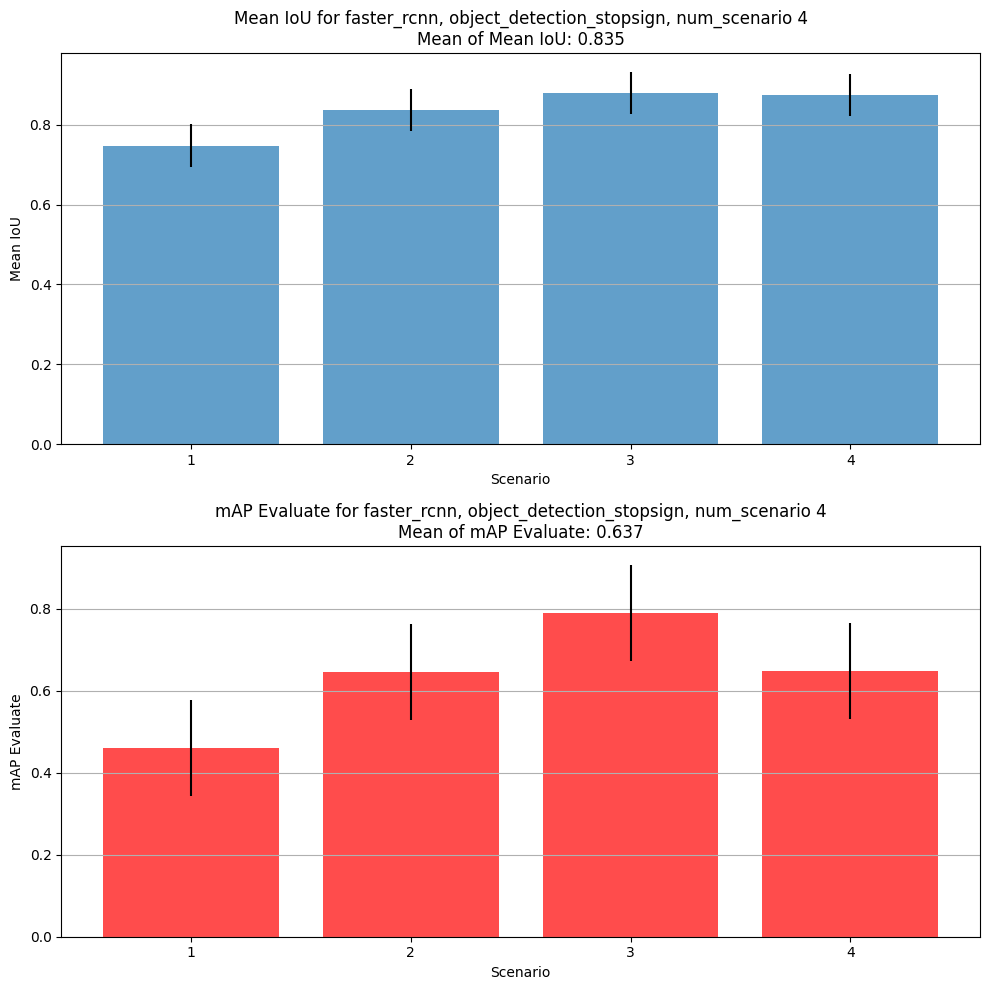

In [24]:
# Plotting the means as horizontal dashed lines
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting mean_iou with its mean
axs[0].plot(range(1, len(mean_iou) + 1), mean_iou, marker='o', linestyle='-', color='b')
axs[0].axhline(y=mean_iou_mean, color='g', linestyle='--')
axs[0].set_title('Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].grid(True)

# Plotting mAP_evaluate with its mean
axs[1].plot(range(1, len(mAP_evaluate) + 1), mAP_evaluate, marker='o', linestyle='-', color='r')
axs[1].axhline(y=mAP_evaluate_mean, color='g', linestyle='--')
axs[1].set_title('mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].grid(True)

plt.tight_layout()
plt.show()

print('--------------------------------')
mean_iou_mean = np.mean(mean_iou)
mean_iou_std = np.std(mean_iou)
mAP_evaluate_mean_rcnn_1 = np.mean(mAP_evaluate)
mAP_evaluate_std_rcnn_1  = np.std(mAP_evaluate)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Bar plot for mean_iou with std as error bars
axs[0].bar(range(1, len(mean_iou) + 1), mean_iou, yerr=mean_iou_std, alpha=0.7)
axs[0].set_title(f'Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of Mean IoU: {mean_iou_mean:.3f}')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].set_xticks(range(1, len(mean_iou) + 1))
axs[0].grid(True, axis='y')

# Bar plot for mAP_evaluate with std as error bars
axs[1].bar(range(1, len(mAP_evaluate) + 1), mAP_evaluate, yerr=mAP_evaluate_std_rcnn_1, color='r', alpha=0.7)
axs[1].set_title(f'mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of mAP Evaluate: {mAP_evaluate_mean_rcnn_1:.3f}')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].set_xticks(range(1, len(mAP_evaluate) + 1))
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

```
Command: python scripts/run.py --mode=eval --agent_cfg yolo.yaml --scenario_cfg object_detection_stopsign_1.yaml --num_scenario 4 --save_video
```

In [25]:
print("agent:yolo, object_detection_stopsign_1, num_scenario 4")
mean_iou        =         [0.5529560391064529, 0.6059463577365259, 0.8485083197769911, 0.833168080319529]
mAP_evaluate     =        [0.30446658221189865, 0.45282222484238444, 0.6380518518388272, 0.44337994400411845]
print(f"mean_iou:{mean_iou}")
print(f"Mean of mean_iou:{np.mean(mean_iou)}")
print(f"Stdev of mean_iou:{np.std(mean_iou)}")
print(f"mAP_evaluate:{mAP_evaluate}")
print(f"Mean of mAP_evaluate:{np.mean(mAP_evaluate)}")
print(f"Stdev of mAP_evaluate:{np.std(mAP_evaluate)}")


mean_iou_mean = np.mean(mean_iou)
mAP_evaluate_mean = np.mean(mAP_evaluate)

agent:yolo, object_detection_stopsign_1, num_scenario 4
mean_iou:[0.5529560391064529, 0.6059463577365259, 0.8485083197769911, 0.833168080319529]
Mean of mean_iou:0.7101446992348747
Stdev of mean_iou:0.1321408462843699
mAP_evaluate:[0.30446658221189865, 0.45282222484238444, 0.6380518518388272, 0.44337994400411845]
Mean of mAP_evaluate:0.4596801507243072
Stdev of mAP_evaluate:0.11855425287117141


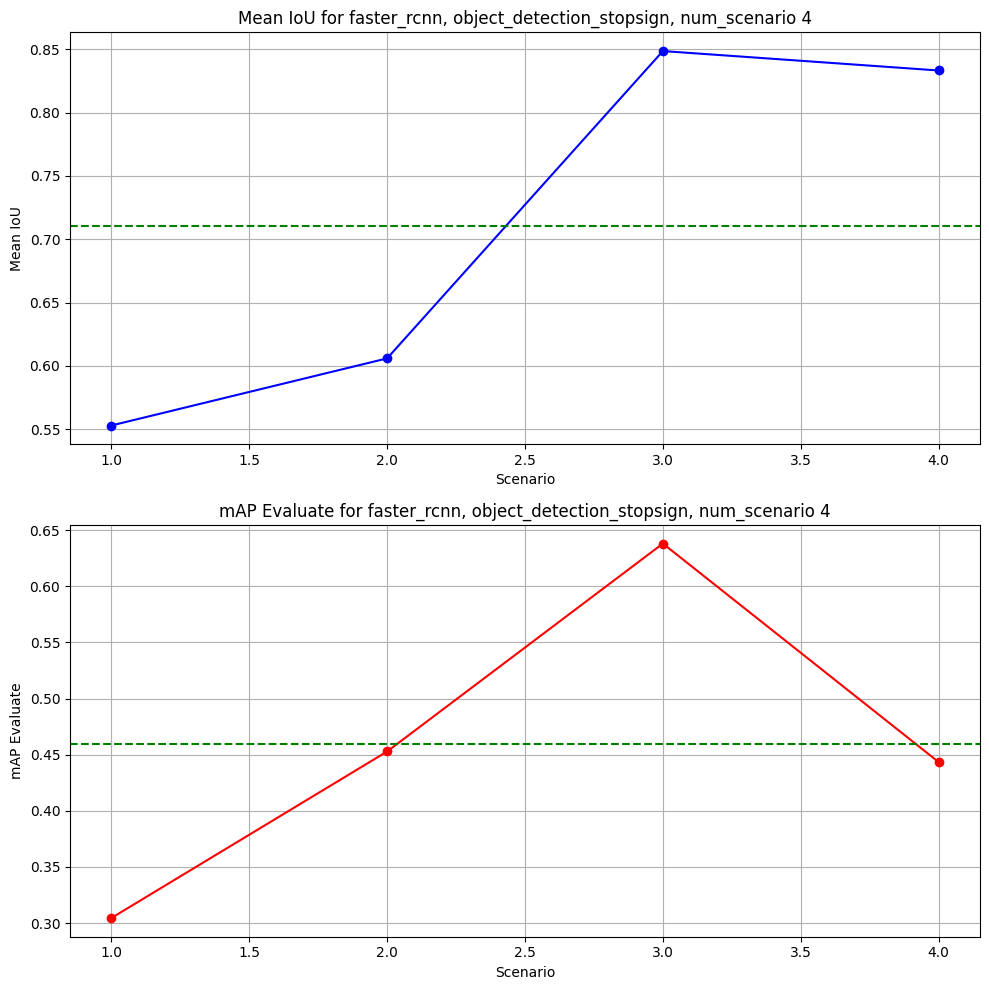

--------------------------------


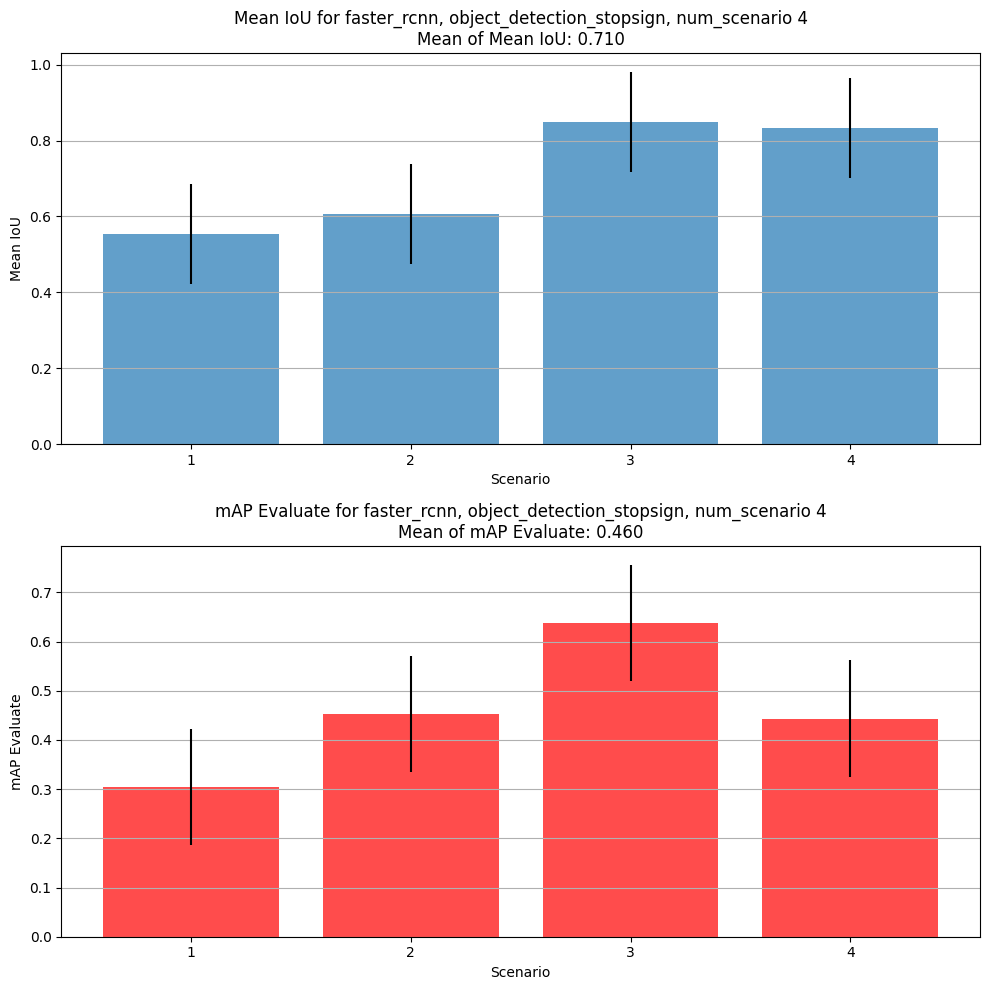

In [26]:
# Plotting the means as horizontal dashed lines
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting mean_iou with its mean
axs[0].plot(range(1, len(mean_iou) + 1), mean_iou, marker='o', linestyle='-', color='b')
axs[0].axhline(y=mean_iou_mean, color='g', linestyle='--')
axs[0].set_title('Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].grid(True)

# Plotting mAP_evaluate with its mean
axs[1].plot(range(1, len(mAP_evaluate) + 1), mAP_evaluate, marker='o', linestyle='-', color='r')
axs[1].axhline(y=mAP_evaluate_mean, color='g', linestyle='--')
axs[1].set_title('mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].grid(True)

plt.tight_layout()
plt.show()

print('--------------------------------')
mean_iou_mean = np.mean(mean_iou)
mean_iou_std = np.std(mean_iou)
mAP_evaluate_mean_rcnn_1 = np.mean(mAP_evaluate)
mAP_evaluate_std_rcnn_1  = np.std(mAP_evaluate)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Bar plot for mean_iou with std as error bars
axs[0].bar(range(1, len(mean_iou) + 1), mean_iou, yerr=mean_iou_std, alpha=0.7)
axs[0].set_title(f'Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of Mean IoU: {mean_iou_mean:.3f}')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].set_xticks(range(1, len(mean_iou) + 1))
axs[0].grid(True, axis='y')

# Bar plot for mAP_evaluate with std as error bars
axs[1].bar(range(1, len(mAP_evaluate) + 1), mAP_evaluate, yerr=mAP_evaluate_std_rcnn_1, color='r', alpha=0.7)
axs[1].set_title(f'mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of mAP Evaluate: {mAP_evaluate_mean_rcnn_1:.3f}')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].set_xticks(range(1, len(mAP_evaluate) + 1))
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

```
#Command: python scripts/run.py --mode=eval --agent_cfg yolo.yaml --scenario_cfg object_detection_stopsign_2.yaml --num_scenario 4 --save_video
```

In [27]:
print("agent:yolo, object_detection_stopsign_2, num_scenario 4")
mean_iou        =         [0.5094793953083374, 0.6252121765004552, 0.8418371998097586, 0.7459403871275161]
mAP_evaluate     =        [0.3058350100982352, 0.42165702357888224, 0.636723185237497, 0.384625331684947]
print(f"mean_iou:{mean_iou}")
print(f"Mean of mean_iou:{np.mean(mean_iou)}")
print(f"Stdev of mean_iou:{np.std(mean_iou)}")
print(f"mAP_evaluate:{mAP_evaluate}")
print(f"Mean of mAP_evaluate:{np.mean(mAP_evaluate)}")
print(f"Stdev of mAP_evaluate:{np.std(mAP_evaluate)}")


mean_iou_mean = np.mean(mean_iou)
mAP_evaluate_mean = np.mean(mAP_evaluate)

agent:yolo, object_detection_stopsign_2, num_scenario 4
mean_iou:[0.5094793953083374, 0.6252121765004552, 0.8418371998097586, 0.7459403871275161]
Mean of mean_iou:0.6806172896865168
Stdev of mean_iou:0.12511681735361319
mAP_evaluate:[0.3058350100982352, 0.42165702357888224, 0.636723185237497, 0.384625331684947]
Mean of mAP_evaluate:0.4372101376498904
Stdev of mAP_evaluate:0.12254789010075287


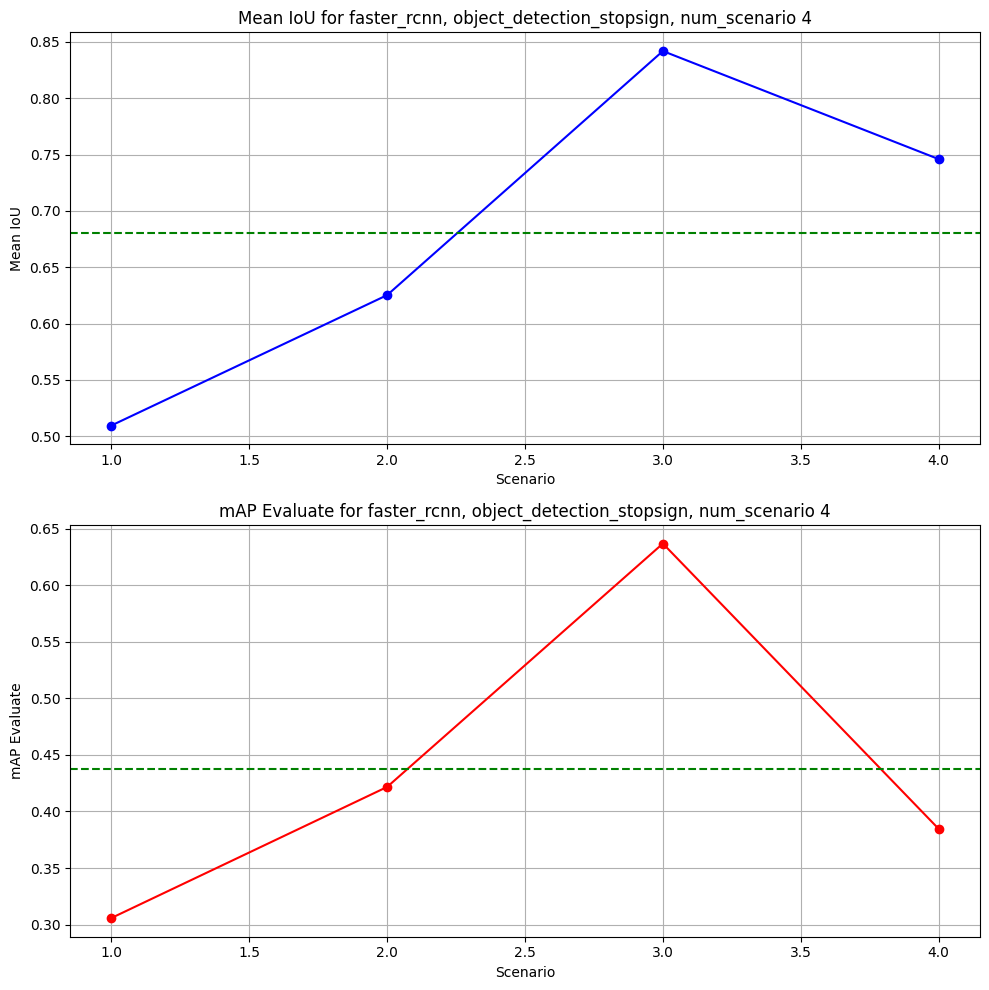

--------------------------------


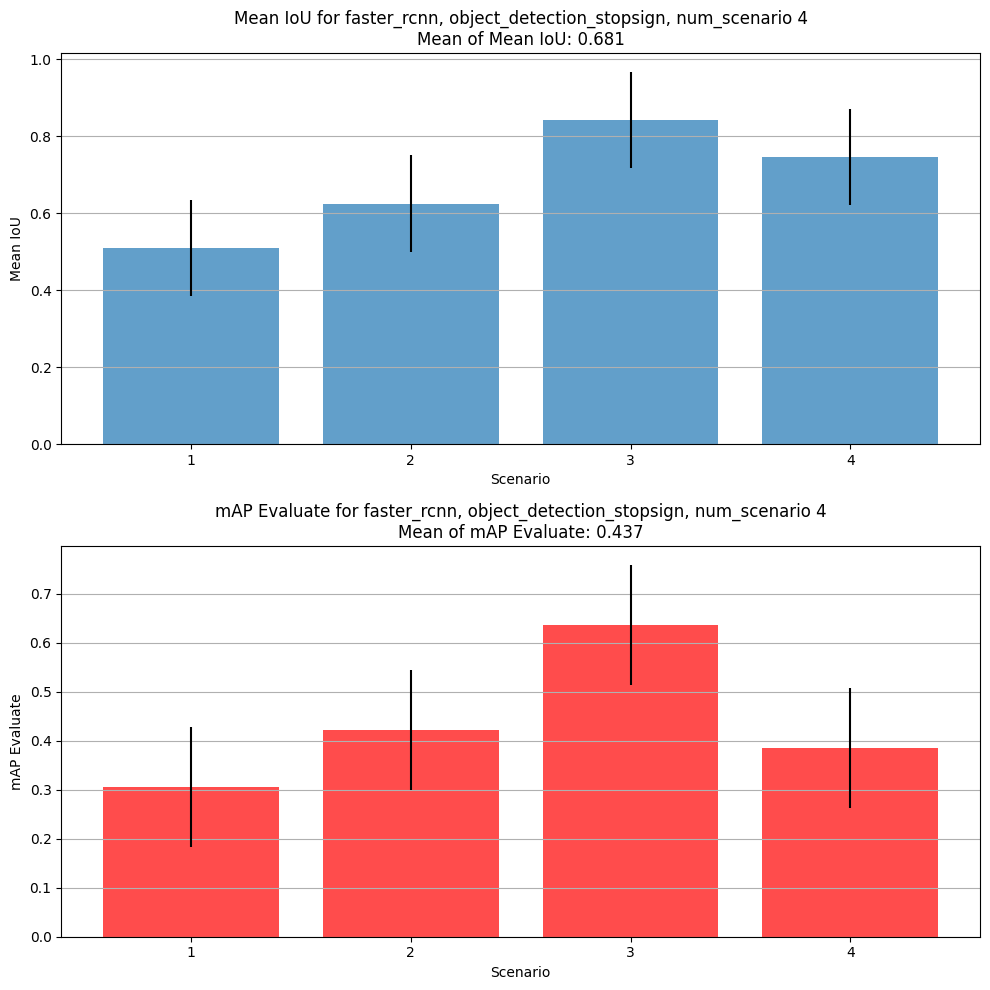

In [28]:
# Plotting the means as horizontal dashed lines
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting mean_iou with its mean
axs[0].plot(range(1, len(mean_iou) + 1), mean_iou, marker='o', linestyle='-', color='b')
axs[0].axhline(y=mean_iou_mean, color='g', linestyle='--')
axs[0].set_title('Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].grid(True)

# Plotting mAP_evaluate with its mean
axs[1].plot(range(1, len(mAP_evaluate) + 1), mAP_evaluate, marker='o', linestyle='-', color='r')
axs[1].axhline(y=mAP_evaluate_mean, color='g', linestyle='--')
axs[1].set_title('mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].grid(True)

plt.tight_layout()
plt.show()

print('--------------------------------')
mean_iou_mean = np.mean(mean_iou)
mean_iou_std = np.std(mean_iou)
mAP_evaluate_mean_rcnn_1 = np.mean(mAP_evaluate)
mAP_evaluate_std_rcnn_1  = np.std(mAP_evaluate)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Bar plot for mean_iou with std as error bars
axs[0].bar(range(1, len(mean_iou) + 1), mean_iou, yerr=mean_iou_std, alpha=0.7)
axs[0].set_title(f'Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of Mean IoU: {mean_iou_mean:.3f}')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].set_xticks(range(1, len(mean_iou) + 1))
axs[0].grid(True, axis='y')

# Bar plot for mAP_evaluate with std as error bars
axs[1].bar(range(1, len(mAP_evaluate) + 1), mAP_evaluate, yerr=mAP_evaluate_std_rcnn_1, color='r', alpha=0.7)
axs[1].set_title(f'mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of mAP Evaluate: {mAP_evaluate_mean_rcnn_1:.3f}')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].set_xticks(range(1, len(mAP_evaluate) + 1))
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

----
# A
## RCNN- 0 rotation (199 by 199)

```
#Command: python scripts/run.py --mode=eval --agent_cfg faster_rcnn.yaml --scenario_cfg object_detection_stopsign_199x199.yaml --num_scenario 4 

```

In [29]:
print("agent:faster_rcnn, object_detection_stopsign_199x199, num_scenario 4")
mean_iou      =           [0.33004343607923486, 0.42803527414798737, 0.7811389001815215, 0.45088060329789703]
mAP_evaluate   =          [0.031123046131142473, 0.1251457642763853, 0.24224033667705952, 0.1599298763088882]
print(f"mean_iou:{mean_iou}")
print(f"Mean of mean_iou:{np.mean(mean_iou)}")
print(f"Stdev of mean_iou:{np.std(mean_iou)}")
print(f"mAP_evaluate:{mAP_evaluate}")
print(f"Mean of mAP_evaluate:{np.mean(mAP_evaluate)}")
print(f"Stdev of mAP_evaluate:{np.std(mAP_evaluate)}")


mean_iou_mean = np.mean(mean_iou)
mAP_evaluate_mean = np.mean(mAP_evaluate)

agent:faster_rcnn, object_detection_stopsign_199x199, num_scenario 4
mean_iou:[0.33004343607923486, 0.42803527414798737, 0.7811389001815215, 0.45088060329789703]
Mean of mean_iou:0.49752455342666024
Stdev of mean_iou:0.16992015799443333
mAP_evaluate:[0.031123046131142473, 0.1251457642763853, 0.24224033667705952, 0.1599298763088882]
Mean of mAP_evaluate:0.13960975584836888
Stdev of mAP_evaluate:0.07570422157024762


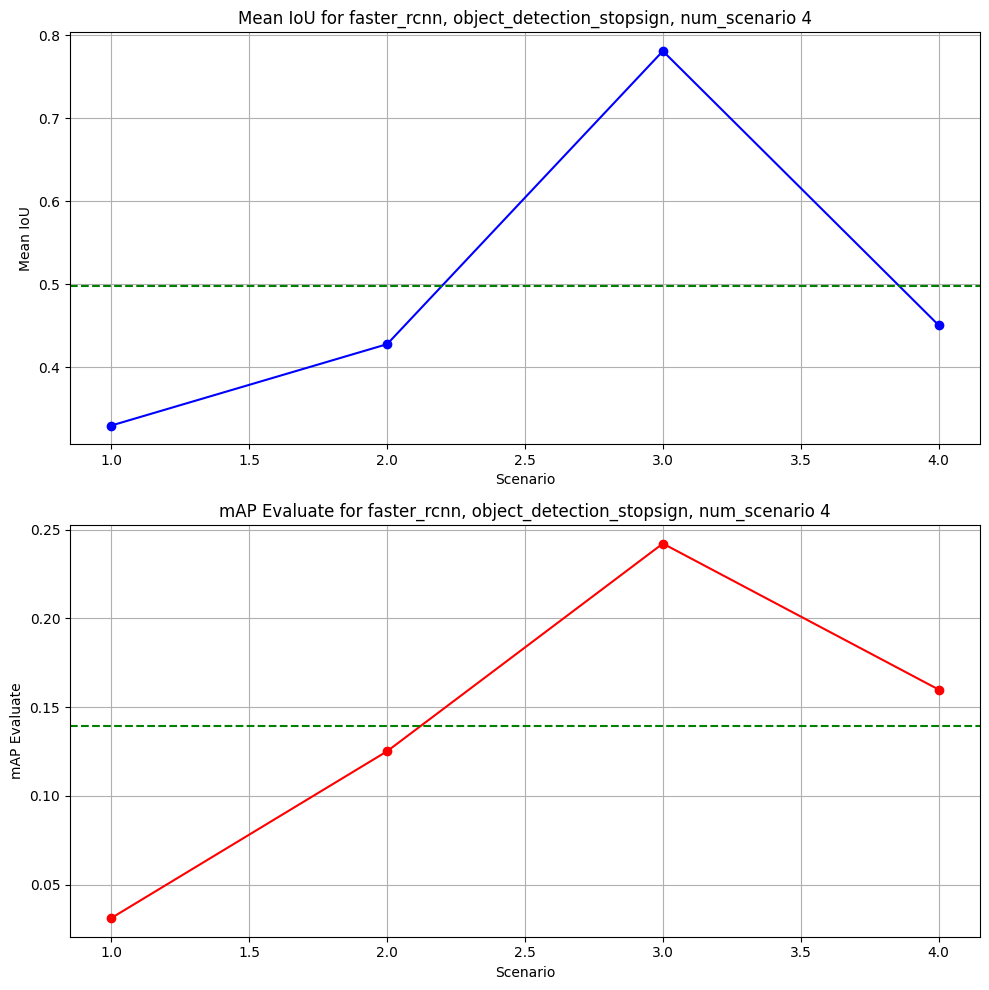

--------------------------------


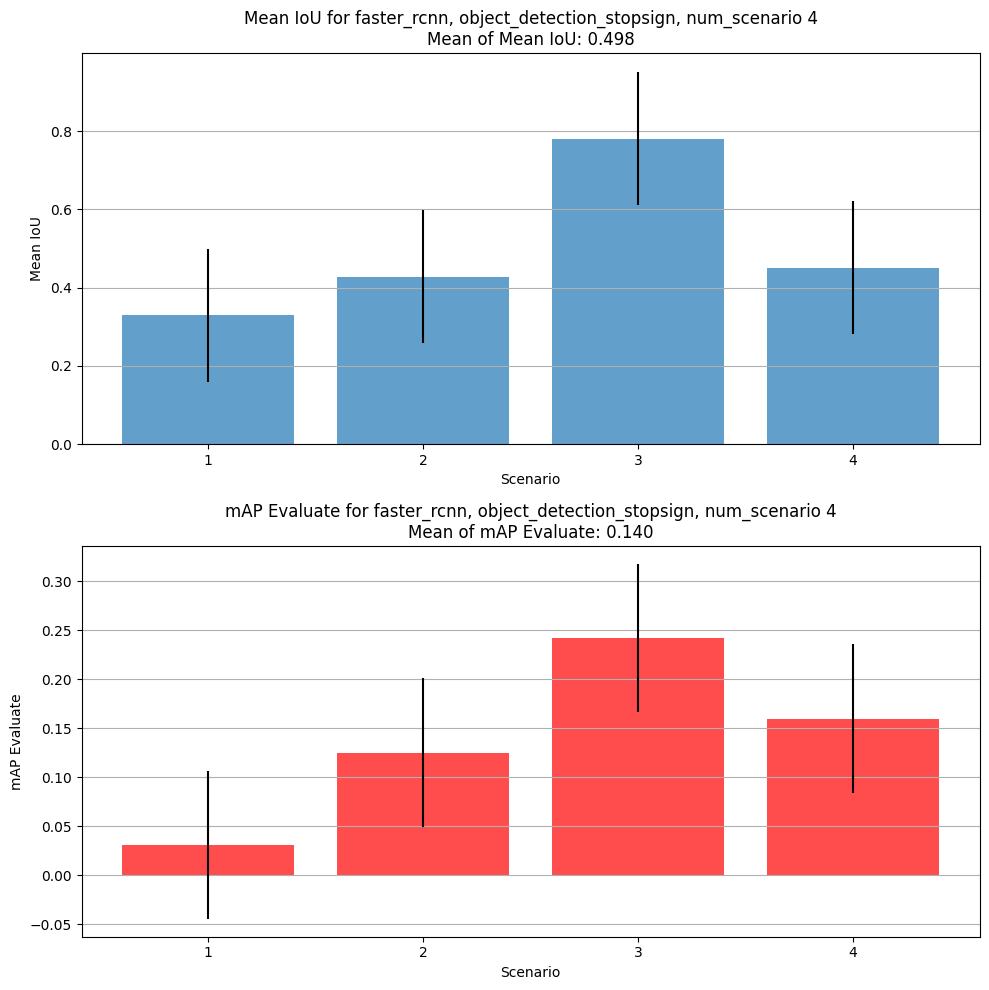

In [30]:
# Plotting the means as horizontal dashed lines
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting mean_iou with its mean
axs[0].plot(range(1, len(mean_iou) + 1), mean_iou, marker='o', linestyle='-', color='b')
axs[0].axhline(y=mean_iou_mean, color='g', linestyle='--')
axs[0].set_title('Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].grid(True)

# Plotting mAP_evaluate with its mean
axs[1].plot(range(1, len(mAP_evaluate) + 1), mAP_evaluate, marker='o', linestyle='-', color='r')
axs[1].axhline(y=mAP_evaluate_mean, color='g', linestyle='--')
axs[1].set_title('mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].grid(True)

plt.tight_layout()
plt.show()

print('--------------------------------')
mean_iou_mean = np.mean(mean_iou)
mean_iou_std = np.std(mean_iou)
mAP_evaluate_mean_rcnn_199 = np.mean(mAP_evaluate)
mAP_evaluate_std_rcnn_199  = np.std(mAP_evaluate)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Bar plot for mean_iou with std as error bars
axs[0].bar(range(1, len(mean_iou) + 1), mean_iou, yerr=mean_iou_std, alpha=0.7)
axs[0].set_title(f'Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of Mean IoU: {mean_iou_mean:.3f}')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].set_xticks(range(1, len(mean_iou) + 1))
axs[0].grid(True, axis='y')

# Bar plot for mAP_evaluate with std as error bars
axs[1].bar(range(1, len(mAP_evaluate) + 1), mAP_evaluate, yerr=mAP_evaluate_std_rcnn_199, color='r', alpha=0.7)
axs[1].set_title(f'mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of mAP Evaluate: {mAP_evaluate_mean_rcnn_199:.3f}')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].set_xticks(range(1, len(mAP_evaluate) + 1))
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

```
Command: python scripts/run.py --mode=eval --agent_cfg yolo.yaml --scenario_cfg object_detection_stopsign_199x199.yaml --num_scenario 4 --save_video
```

In [31]:
print("agent:yolo, object_detection_stopsign_199x199, num_scenario 4")
mean_iou       =          [0.7566506525317391, 0.853646712458652, 0.8508793232233628, 0.8650941311017327]
mAP_evaluate    =         [0.4074185799283441, 0.5235103786922991, 0.702106661349535, 0.5330540347844362]
print(f"mean_iou:{mean_iou}")
print(f"Mean of mean_iou:{np.mean(mean_iou)}")
print(f"Stdev of mean_iou:{np.std(mean_iou)}")
print(f"mAP_evaluate:{mAP_evaluate}")
print(f"Mean of mAP_evaluate:{np.mean(mAP_evaluate)}")
print(f"Stdev of mAP_evaluate:{np.std(mAP_evaluate)}")


mean_iou_mean = np.mean(mean_iou)
mAP_evaluate_mean = np.mean(mAP_evaluate)

agent:yolo, object_detection_stopsign_199x199, num_scenario 4
mean_iou:[0.7566506525317391, 0.853646712458652, 0.8508793232233628, 0.8650941311017327]
Mean of mean_iou:0.8315677048288717
Stdev of mean_iou:0.04358040605149069
mAP_evaluate:[0.4074185799283441, 0.5235103786922991, 0.702106661349535, 0.5330540347844362]
Mean of mAP_evaluate:0.5415224136886536
Stdev of mAP_evaluate:0.10508007145981502


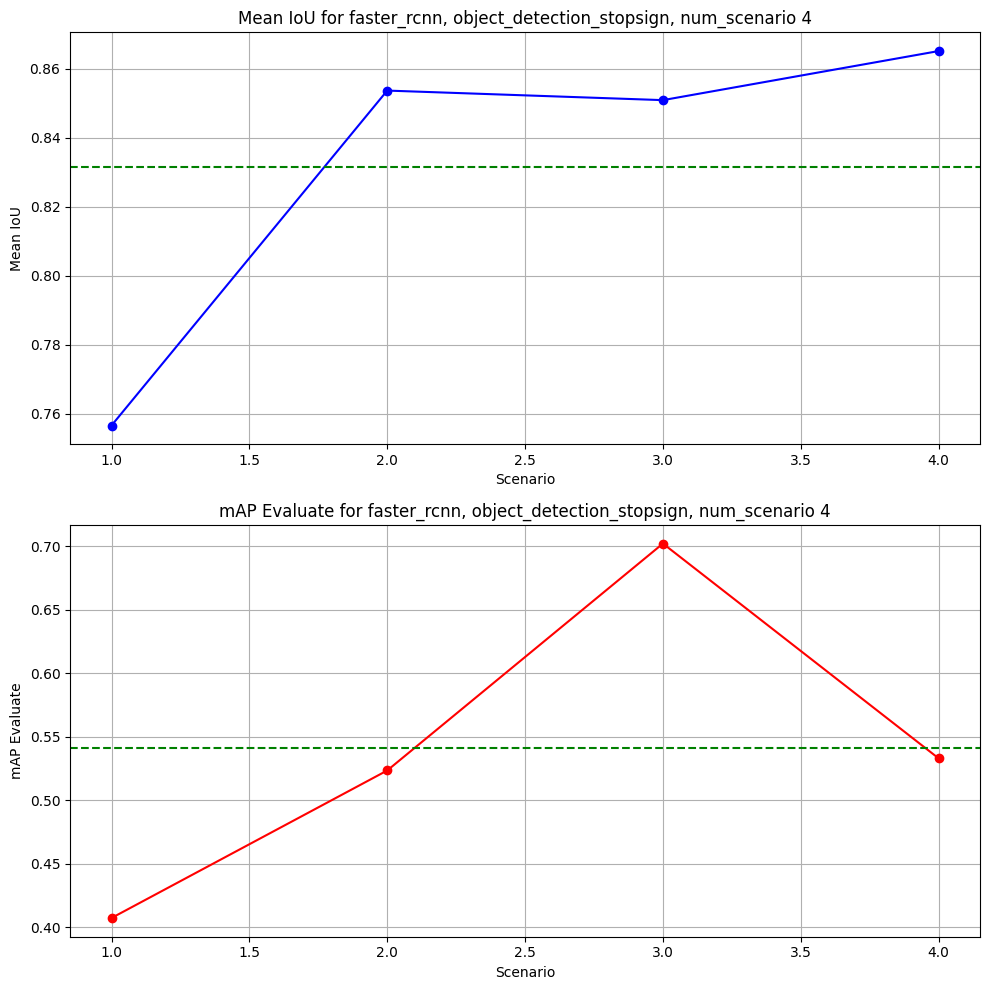

--------------------------------


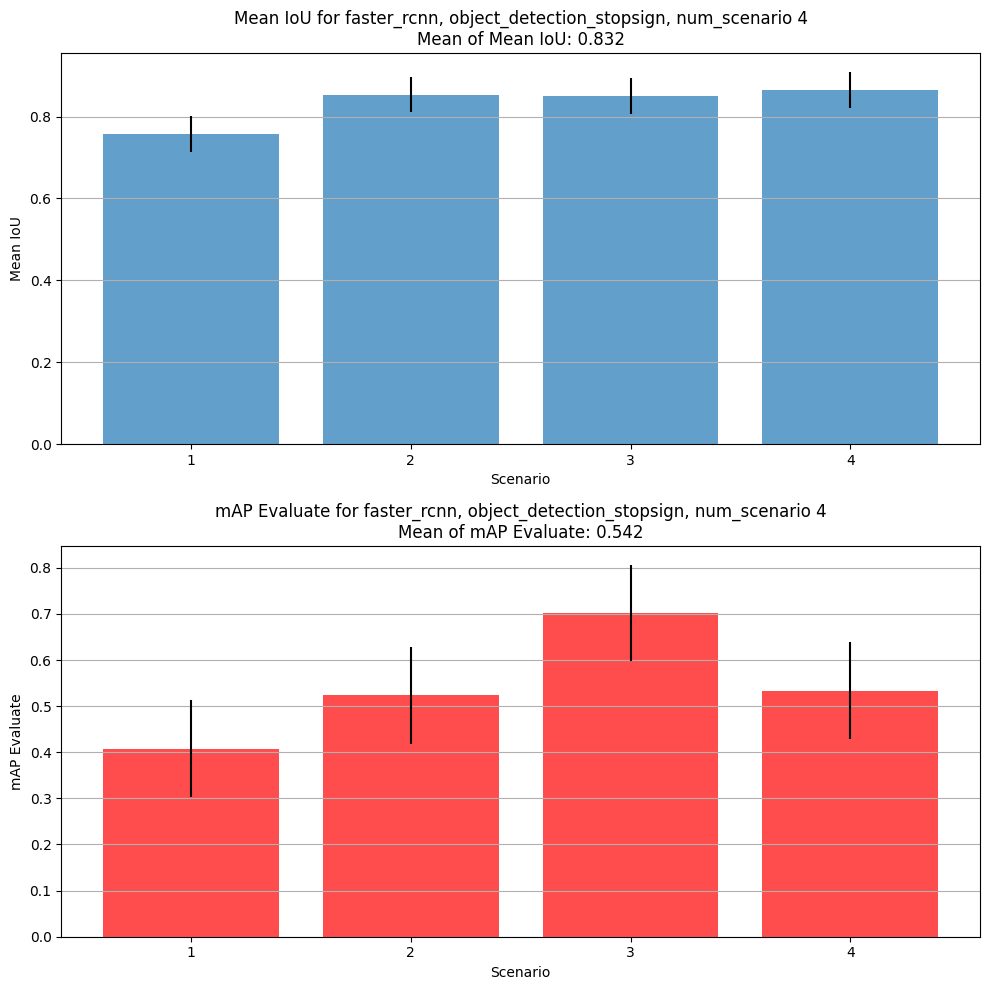

In [32]:
# Plotting the means as horizontal dashed lines
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting mean_iou with its mean
axs[0].plot(range(1, len(mean_iou) + 1), mean_iou, marker='o', linestyle='-', color='b')
axs[0].axhline(y=mean_iou_mean, color='g', linestyle='--')
axs[0].set_title('Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].grid(True)

# Plotting mAP_evaluate with its mean
axs[1].plot(range(1, len(mAP_evaluate) + 1), mAP_evaluate, marker='o', linestyle='-', color='r')
axs[1].axhline(y=mAP_evaluate_mean, color='g', linestyle='--')
axs[1].set_title('mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].grid(True)

plt.tight_layout()
plt.show()

print('--------------------------------')
mean_iou_mean = np.mean(mean_iou)
mean_iou_std = np.std(mean_iou)
mAP_evaluate_mean_yolo_199 = np.mean(mAP_evaluate)
mAP_evaluate_std_yolo_199  = np.std(mAP_evaluate)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Bar plot for mean_iou with std as error bars
axs[0].bar(range(1, len(mean_iou) + 1), mean_iou, yerr=mean_iou_std, alpha=0.7)
axs[0].set_title(f'Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of Mean IoU: {mean_iou_mean:.3f}')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].set_xticks(range(1, len(mean_iou) + 1))
axs[0].grid(True, axis='y')

# Bar plot for mAP_evaluate with std as error bars
axs[1].bar(range(1, len(mAP_evaluate) + 1), mAP_evaluate, yerr=mAP_evaluate_std_yolo_199, color='r', alpha=0.7)
axs[1].set_title(f'mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of mAP Evaluate: {mAP_evaluate_mean_yolo_199:.3f}')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].set_xticks(range(1, len(mAP_evaluate) + 1))
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

# C
## rcnn_100_0rot
```
#Command: python scripts/run.py --mode=eval --agent_cfg faster_rcnn.yaml --scenario_cfg object_detection_stopsign_100x100_0rot.yaml --num_scenario 4 
```

In [33]:
print("agent:faster_rcnn, object_detection_stopsign_100x100_0rot, num_scenario 4")

mean_iou      =           [0.3510239482710582, 0.410120305682385, 0.6778201746462982, 0.5119229360018275]
mAP_evaluate   =          [0.0562734069267891, 0.171223898389452, 0.2669783025120123, 0.2212740293750909]
print(f"mean_iou:{mean_iou}")
print(f"Mean of mean_iou:{np.mean(mean_iou)}")
print(f"Stdev of mean_iou:{np.std(mean_iou)}")
print(f"mAP_evaluate:{mAP_evaluate}")
print(f"Mean of mAP_evaluate:{np.mean(mAP_evaluate)}")
print(f"Stdev of mAP_evaluate:{np.std(mAP_evaluate)}")


mean_iou_mean = np.mean(mean_iou)
mAP_evaluate_mean = np.mean(mAP_evaluate)

agent:faster_rcnn, object_detection_stopsign_100x100_0rot, num_scenario 4
mean_iou:[0.3510239482710582, 0.410120305682385, 0.6778201746462982, 0.5119229360018275]
Mean of mean_iou:0.4877218411503922
Stdev of mean_iou:0.12392677436148646
mAP_evaluate:[0.0562734069267891, 0.171223898389452, 0.2669783025120123, 0.2212740293750909]
Mean of mAP_evaluate:0.1789374093008361
Stdev of mAP_evaluate:0.07850086624638893


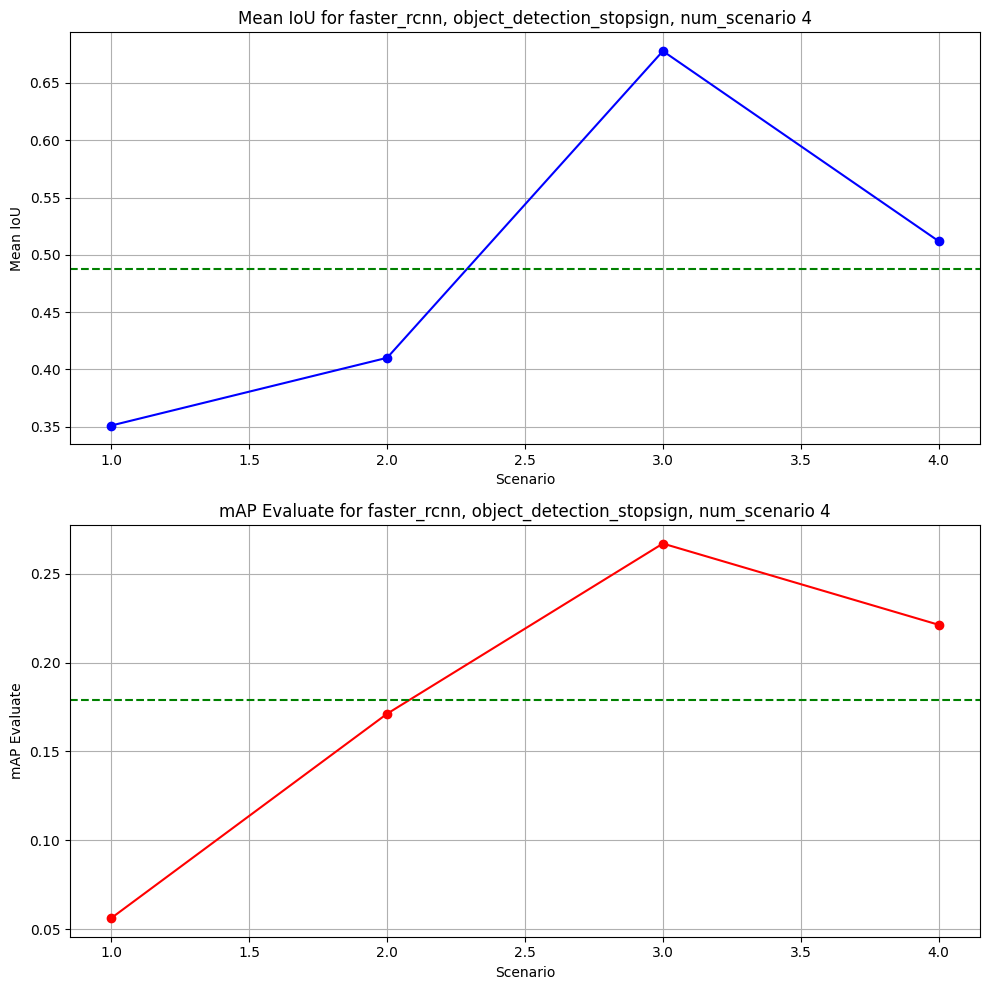

--------------------------------


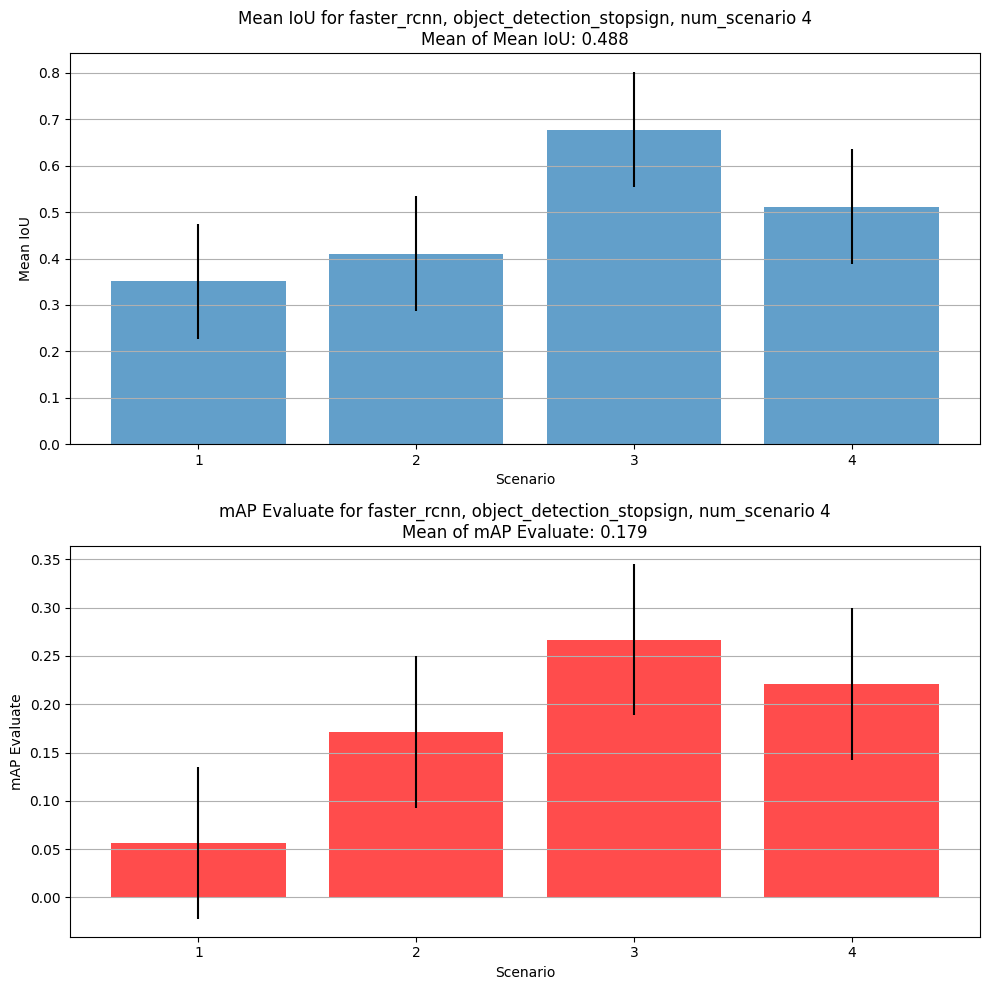

In [34]:
# Plotting the means as horizontal dashed lines
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting mean_iou with its mean
axs[0].plot(range(1, len(mean_iou) + 1), mean_iou, marker='o', linestyle='-', color='b')
axs[0].axhline(y=mean_iou_mean, color='g', linestyle='--')
axs[0].set_title('Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].grid(True)

# Plotting mAP_evaluate with its mean
axs[1].plot(range(1, len(mAP_evaluate) + 1), mAP_evaluate, marker='o', linestyle='-', color='r')
axs[1].axhline(y=mAP_evaluate_mean, color='g', linestyle='--')
axs[1].set_title('mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].grid(True)

plt.tight_layout()
plt.show()

print('--------------------------------')
mean_iou_mean = np.mean(mean_iou)
mean_iou_std = np.std(mean_iou)
mAP_evaluate_mean_rcnn_100_0rot = np.mean(mAP_evaluate)
mAP_evaluate_std_rcnn_100_0rot  = np.std(mAP_evaluate)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Bar plot for mean_iou with std as error bars
axs[0].bar(range(1, len(mean_iou) + 1), mean_iou, yerr=mean_iou_std, alpha=0.7)
axs[0].set_title(f'Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of Mean IoU: {mean_iou_mean:.3f}')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].set_xticks(range(1, len(mean_iou) + 1))
axs[0].grid(True, axis='y')

# Bar plot for mAP_evaluate with std as error bars
axs[1].bar(range(1, len(mAP_evaluate) + 1), mAP_evaluate, yerr=mAP_evaluate_std_rcnn_100_0rot, color='r', alpha=0.7)
axs[1].set_title(f'mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of mAP Evaluate: {mAP_evaluate_mean_rcnn_100_0rot:.3f}')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].set_xticks(range(1, len(mAP_evaluate) + 1))
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

## yolo_100_0rot
```
#Command: python scripts/run.py --mode=eval --agent_cfg yolo.yaml --scenario_cfg object_detection_stopsign_100x100_0rot.yaml --num_scenario 4 --save_video

```

In [35]:

print("agent:yolo, object_detection_stopsign_100x100_0rot, num_scenario 4")

mean_iou       =   [0.7563827127490872, 0.848205910831023, 0.8792817300620623, 0.8612961021082759]
mAP_evaluate   =   [0.4369186287374917, 0.611692387901980, 0.7316926938707020, 0.6201789712983821]


print(f"mean_iou:{mean_iou}")
print(f"Mean of mean_iou:{np.mean(mean_iou)}")
print(f"Stdev of mean_iou:{np.std(mean_iou)}")
print(f"mAP_evaluate:{mAP_evaluate}")
print(f"Mean of mAP_evaluate:{np.mean(mAP_evaluate)}")
print(f"Stdev of mAP_evaluate:{np.std(mAP_evaluate)}")


mean_iou_mean = np.mean(mean_iou)
mAP_evaluate_mean = np.mean(mAP_evaluate)


agent:yolo, object_detection_stopsign_100x100_0rot, num_scenario 4
mean_iou:[0.7563827127490872, 0.848205910831023, 0.8792817300620623, 0.8612961021082759]
Mean of mean_iou:0.8362916139376122
Stdev of mean_iou:0.047436160976338404
mAP_evaluate:[0.4369186287374917, 0.61169238790198, 0.731692693870702, 0.6201789712983821]
Mean of mAP_evaluate:0.6001206704521389
Stdev of mAP_evaluate:0.10545418892090266


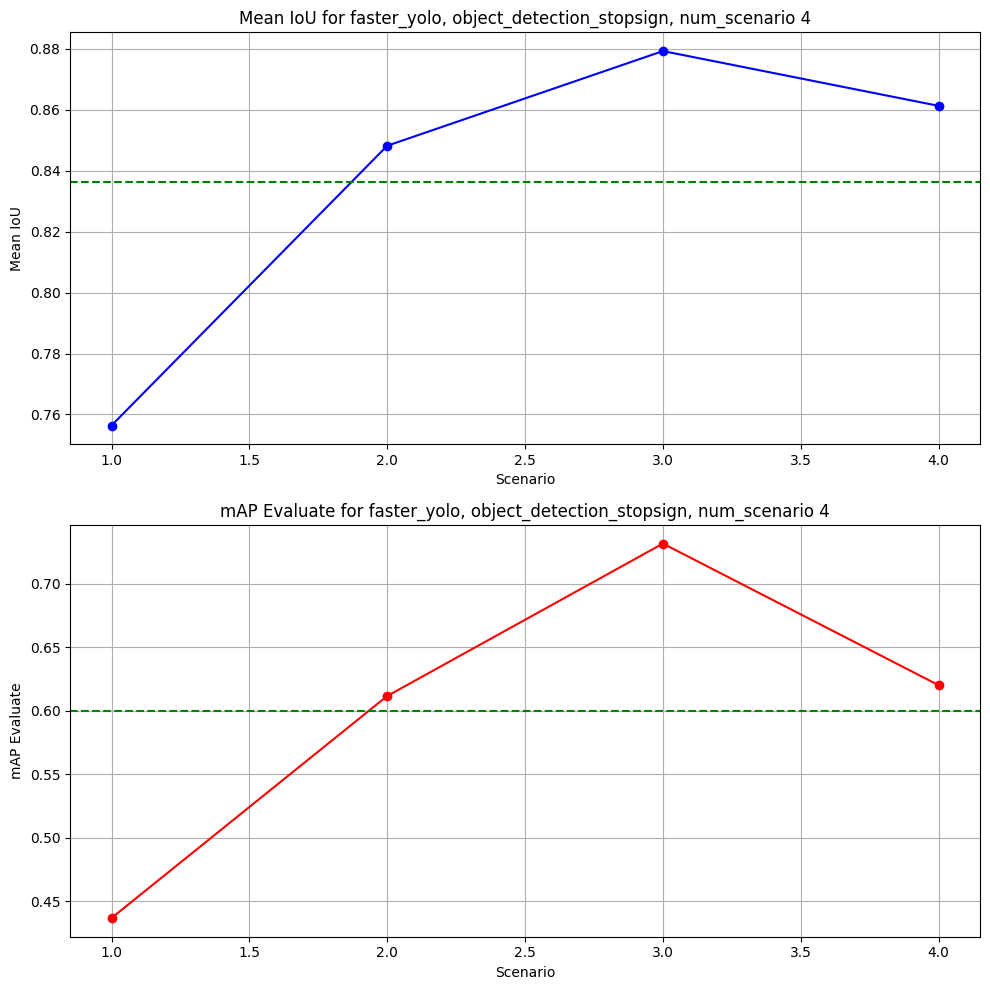

--------------------------------


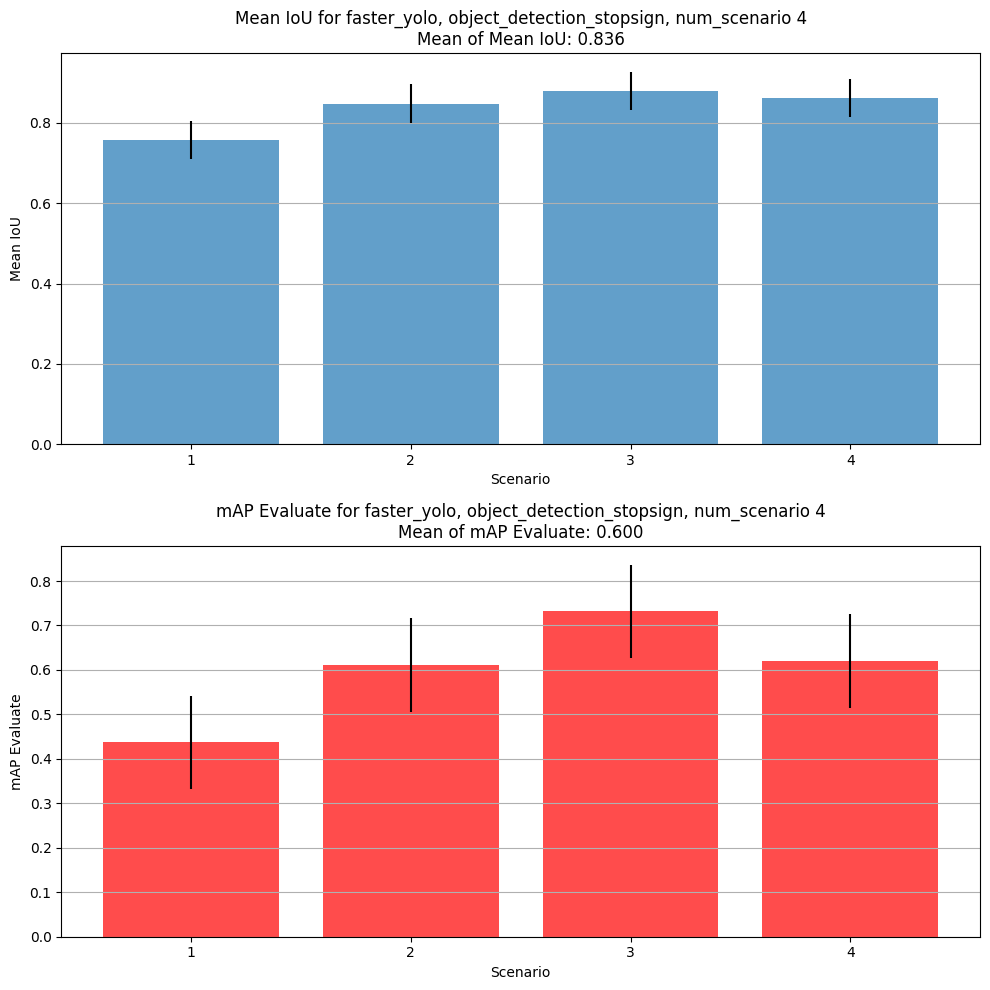

In [36]:
# Plotting the means as horizontal dashed lines
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting mean_iou with its mean
axs[0].plot(range(1, len(mean_iou) + 1), mean_iou, marker='o', linestyle='-', color='b')
axs[0].axhline(y=mean_iou_mean, color='g', linestyle='--')
axs[0].set_title('Mean IoU for faster_yolo, object_detection_stopsign, num_scenario 4')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].grid(True)

# Plotting mAP_evaluate with its mean
axs[1].plot(range(1, len(mAP_evaluate) + 1), mAP_evaluate, marker='o', linestyle='-', color='r')
axs[1].axhline(y=mAP_evaluate_mean, color='g', linestyle='--')
axs[1].set_title('mAP Evaluate for faster_yolo, object_detection_stopsign, num_scenario 4')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].grid(True)

plt.tight_layout()
plt.show()

print('--------------------------------')
mean_iou_mean = np.mean(mean_iou)
mean_iou_std = np.std(mean_iou)
mAP_evaluate_mean_yolo_100_0rot = np.mean(mAP_evaluate)
mAP_evaluate_std_yolo_100_0rot  = np.std(mAP_evaluate)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Bar plot for mean_iou with std as error bars
axs[0].bar(range(1, len(mean_iou) + 1), mean_iou, yerr=mean_iou_std, alpha=0.7)
axs[0].set_title(f'Mean IoU for faster_yolo, object_detection_stopsign, num_scenario 4\nMean of Mean IoU: {mean_iou_mean:.3f}')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].set_xticks(range(1, len(mean_iou) + 1))
axs[0].grid(True, axis='y')

# Bar plot for mAP_evaluate with std as error bars
axs[1].bar(range(1, len(mAP_evaluate) + 1), mAP_evaluate, yerr=mAP_evaluate_std_yolo_100_0rot, color='r', alpha=0.7)
axs[1].set_title(f'mAP Evaluate for faster_yolo, object_detection_stopsign, num_scenario 4\nMean of mAP Evaluate: {mAP_evaluate_mean_yolo_100_0rot:.3f}')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].set_xticks(range(1, len(mAP_evaluate) + 1))
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

## RCNN- 45- rotation (199 by 199)

```
#Command: python scripts/run.py --mode=eval --agent_cfg faster_rcnn.yaml --scenario_cfg object_detection_stopsign_199x199_45rot.yaml --num_scenario 4 
```

agent:faster_rcnn, object_detection_stopsign_199x199_45rot, num_scenario 4
mean_iou:[0.3479282910120405, 0.415152258286201, 0.819872572918502, 0.4526387826173463]
Mean of mean_iou:0.5088979762085225
Stdev of mean_iou:0.18341878028400596
mAP_evaluate:[0.0320902603871072, 0.134782927927479, 0.2310100339828572, 0.1897073750937761]
Mean of mAP_evaluate:0.14689764934780486
Stdev of mAP_evaluate:0.07455714067496366


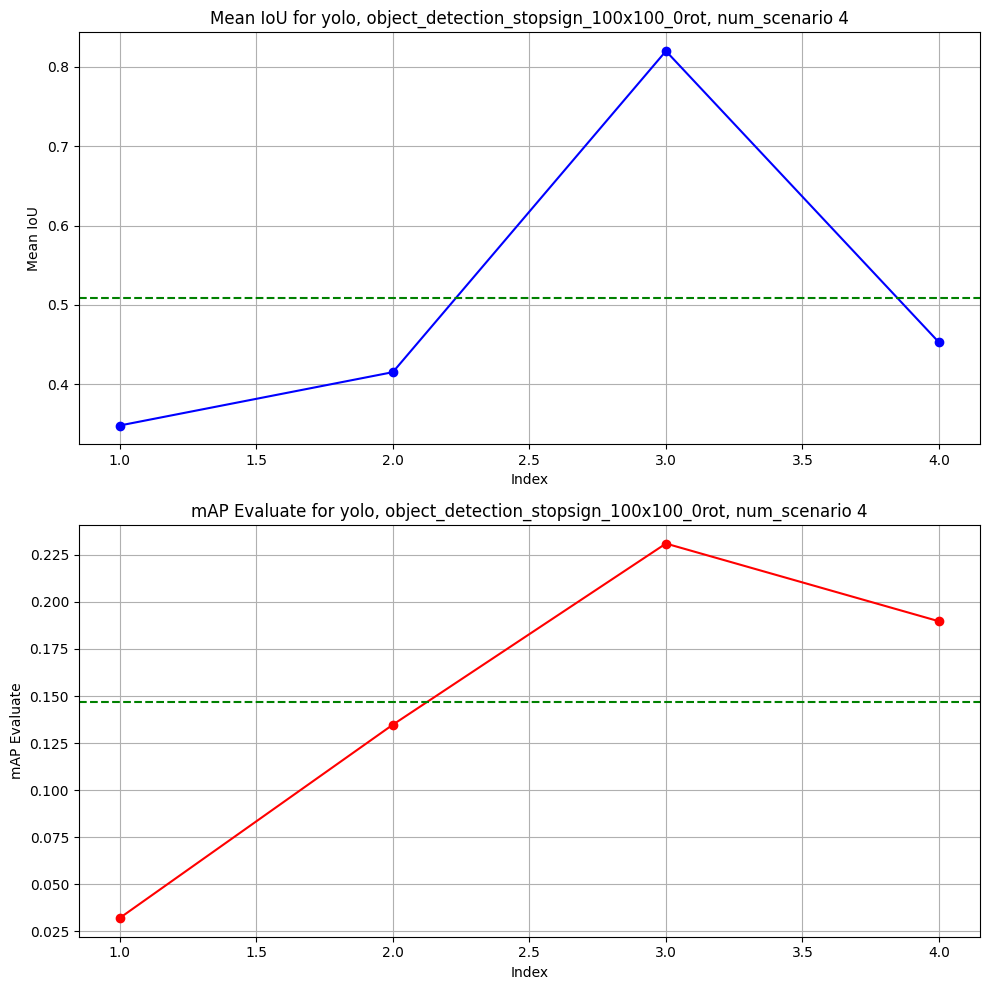

In [37]:
#Command: python scripts/run.py --mode=eval --agent_cfg faster_rcnn.yaml --scenario_cfg object_detection_stopsign_199x199_45rot.yaml --num_scenario 4 
print("agent:faster_rcnn, object_detection_stopsign_199x199_45rot, num_scenario 4")

mean_iou        =      [0.3479282910120405, 0.415152258286201, 0.8198725729185020, 0.4526387826173463]
mAP_evaluate   =       [0.0320902603871072, 0.134782927927479, 0.2310100339828572, 0.1897073750937761]
print(f"mean_iou:{mean_iou}")
print(f"Mean of mean_iou:{np.mean(mean_iou)}")
print(f"Stdev of mean_iou:{np.std(mean_iou)}")
print(f"mAP_evaluate:{mAP_evaluate}")
print(f"Mean of mAP_evaluate:{np.mean(mAP_evaluate)}")
print(f"Stdev of mAP_evaluate:{np.std(mAP_evaluate)}")


mean_iou_mean = np.mean(mean_iou)
mAP_evaluate_mean = np.mean(mAP_evaluate)

# Plotting the means as horizontal dashed lines
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting mean_iou with its mean
axs[0].plot(range(1, len(mean_iou) + 1), mean_iou, marker='o', linestyle='-', color='b')
axs[0].axhline(y=mean_iou_mean, color='g', linestyle='--')
axs[0].set_title('Mean IoU for yolo, object_detection_stopsign_100x100_0rot, num_scenario 4')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Mean IoU')
axs[0].grid(True)

# Plotting mAP_evaluate with its mean
axs[1].plot(range(1, len(mAP_evaluate) + 1), mAP_evaluate, marker='o', linestyle='-', color='r')
axs[1].axhline(y=mAP_evaluate_mean, color='g', linestyle='--')
axs[1].set_title('mAP Evaluate for yolo, object_detection_stopsign_100x100_0rot, num_scenario 4')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('mAP Evaluate')
axs[1].grid(True)

plt.tight_layout()
plt.show()

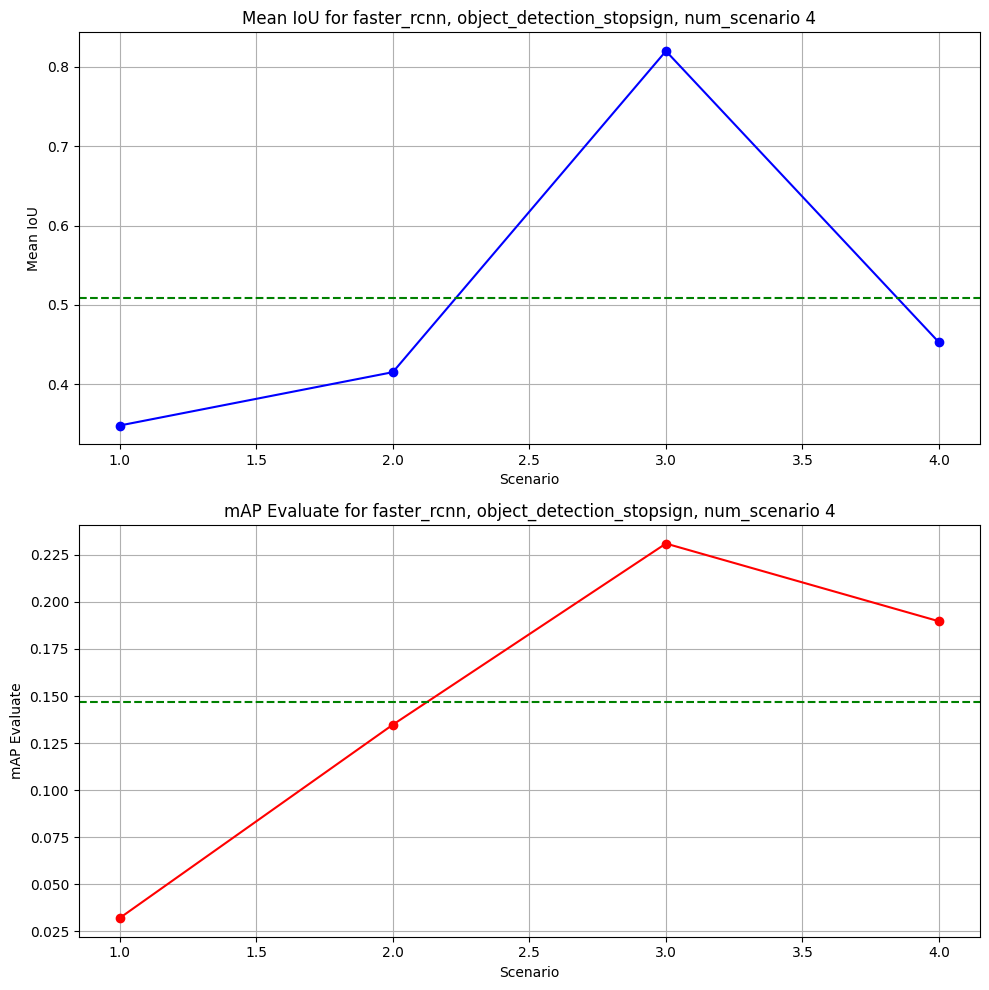

--------------------------------


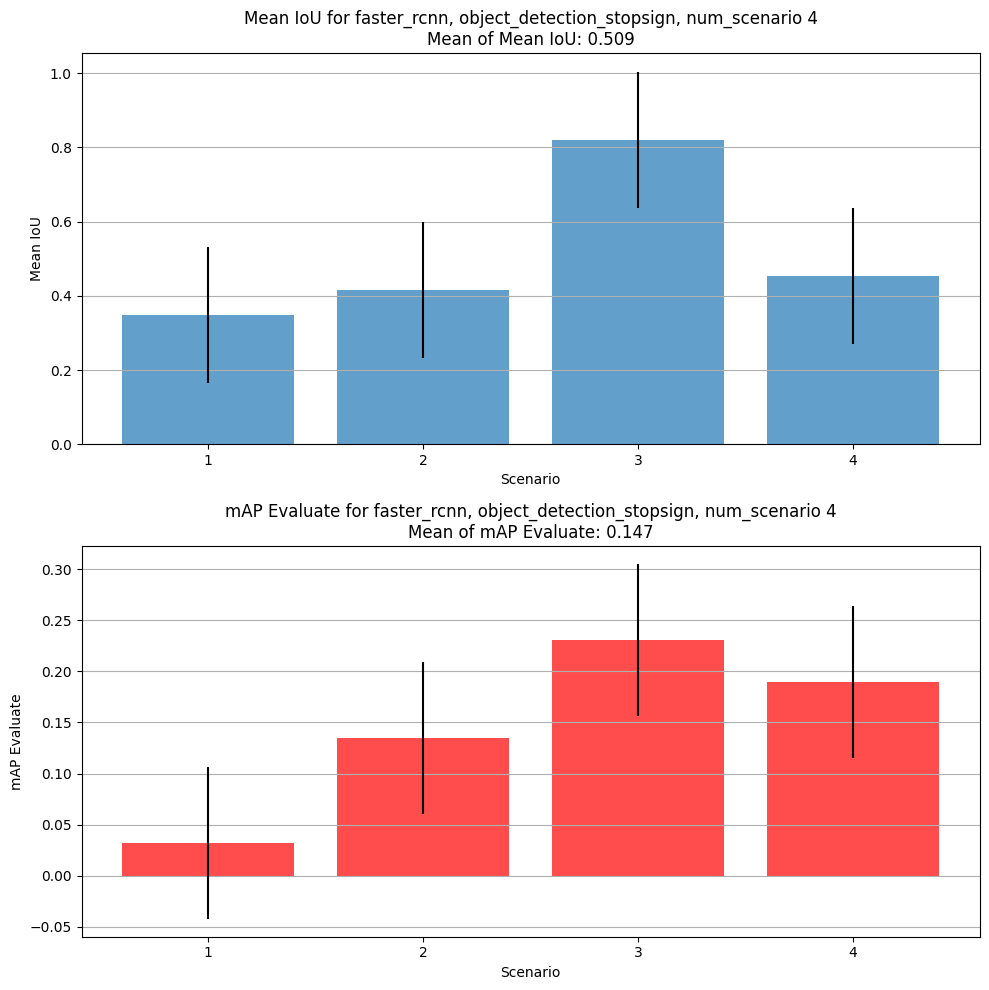

In [38]:
# Plotting the means as horizontal dashed lines
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting mean_iou with its mean
axs[0].plot(range(1, len(mean_iou) + 1), mean_iou, marker='o', linestyle='-', color='b')
axs[0].axhline(y=mean_iou_mean, color='g', linestyle='--')
axs[0].set_title('Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].grid(True)

# Plotting mAP_evaluate with its mean
axs[1].plot(range(1, len(mAP_evaluate) + 1), mAP_evaluate, marker='o', linestyle='-', color='r')
axs[1].axhline(y=mAP_evaluate_mean, color='g', linestyle='--')
axs[1].set_title('mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].grid(True)

plt.tight_layout()
plt.show()

print('--------------------------------')
mean_iou_mean = np.mean(mean_iou)
mean_iou_std = np.std(mean_iou)
mAP_evaluate_mean_rcnn_199_45rot = np.mean(mAP_evaluate)
mAP_evaluate_std_rcnn_199_45rot  = np.std(mAP_evaluate)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Bar plot for mean_iou with std as error bars
axs[0].bar(range(1, len(mean_iou) + 1), mean_iou, yerr=mean_iou_std, alpha=0.7)
axs[0].set_title(f'Mean IoU for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of Mean IoU: {mean_iou_mean:.3f}')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].set_xticks(range(1, len(mean_iou) + 1))
axs[0].grid(True, axis='y')

# Bar plot for mAP_evaluate with std as error bars
axs[1].bar(range(1, len(mAP_evaluate) + 1), mAP_evaluate, yerr=mAP_evaluate_std_rcnn_199_45rot, color='r', alpha=0.7)
axs[1].set_title(f'mAP Evaluate for faster_rcnn, object_detection_stopsign, num_scenario 4\nMean of mAP Evaluate: {mAP_evaluate_mean_rcnn_199_45rot:.3f}')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].set_xticks(range(1, len(mAP_evaluate) + 1))
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

## YOLO- 45 rotation (199 by 199)

```
#Command: python scripts/run.py --mode=eval --agent_cfg yolo.yaml --scenario_cfg object_detection_stopsign_199x199_45rot.yaml --num_scenario 4 --save_video
```

In [39]:

mean_iou   =          [0.7607071928349381, 0.830481970165922, 0.8769687564358671, 0.8369823297957492]
mAP_evaluate      =   [0.4060602608736182, 0.494920239470102, 0.6712378320102034, 0.5487029384018402]
print(f"mean_iou:{mean_iou}")
print(f"Mean of mean_iou:{np.mean(mean_iou)}")
print(f"Stdev of mean_iou:{np.std(mean_iou)}")
print(f"mAP_evaluate:{mAP_evaluate}")
print(f"Mean of mAP_evaluate:{np.mean(mAP_evaluate)}")
print(f"Stdev of mAP_evaluate:{np.std(mAP_evaluate)}")


mean_iou_mean = np.mean(mean_iou)
mAP_evaluate_mean = np.mean(mAP_evaluate)

mean_iou:[0.7607071928349382, 0.830481970165922, 0.8769687564358671, 0.8369823297957492]
Mean of mean_iou:0.8262850623081192
Stdev of mean_iou:0.041837003305523306
mAP_evaluate:[0.4060602608736182, 0.494920239470102, 0.6712378320102034, 0.5487029384018401]
Mean of mAP_evaluate:0.5302303176889409
Stdev of mAP_evaluate:0.09603301703633582


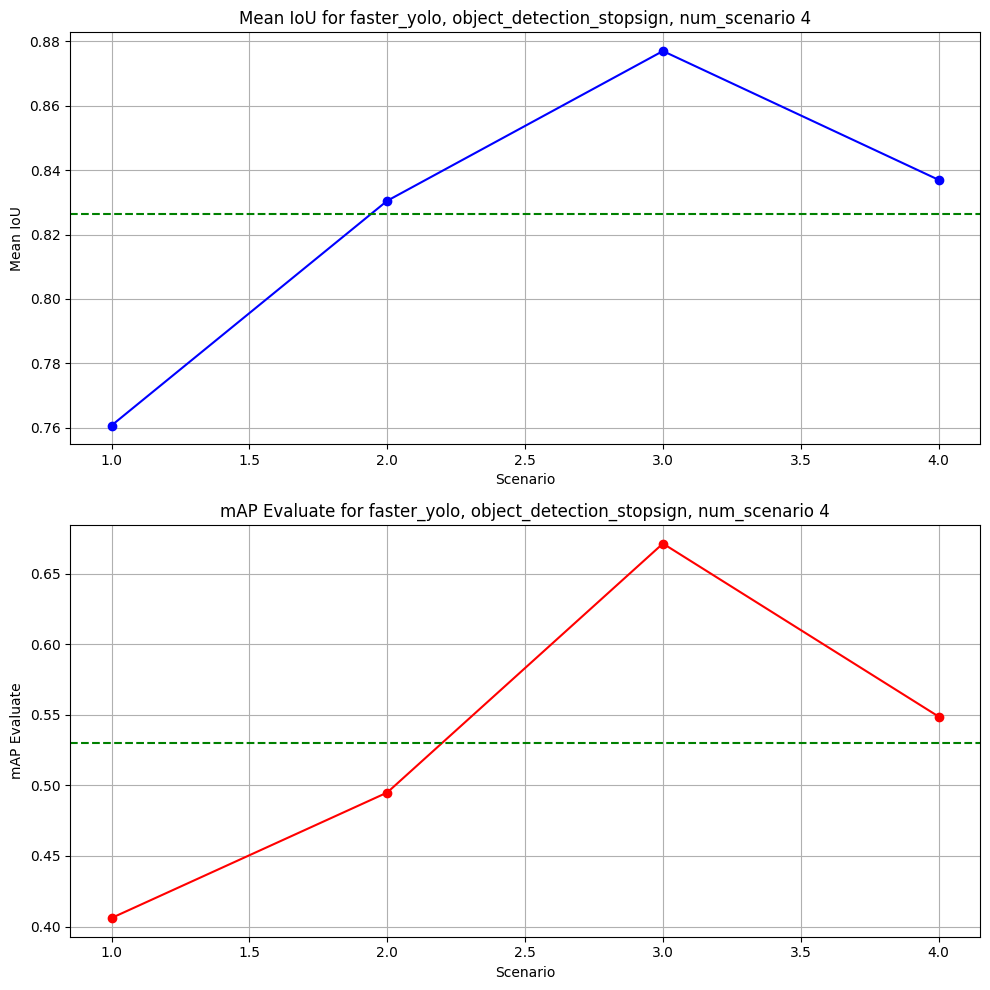

--------------------------------


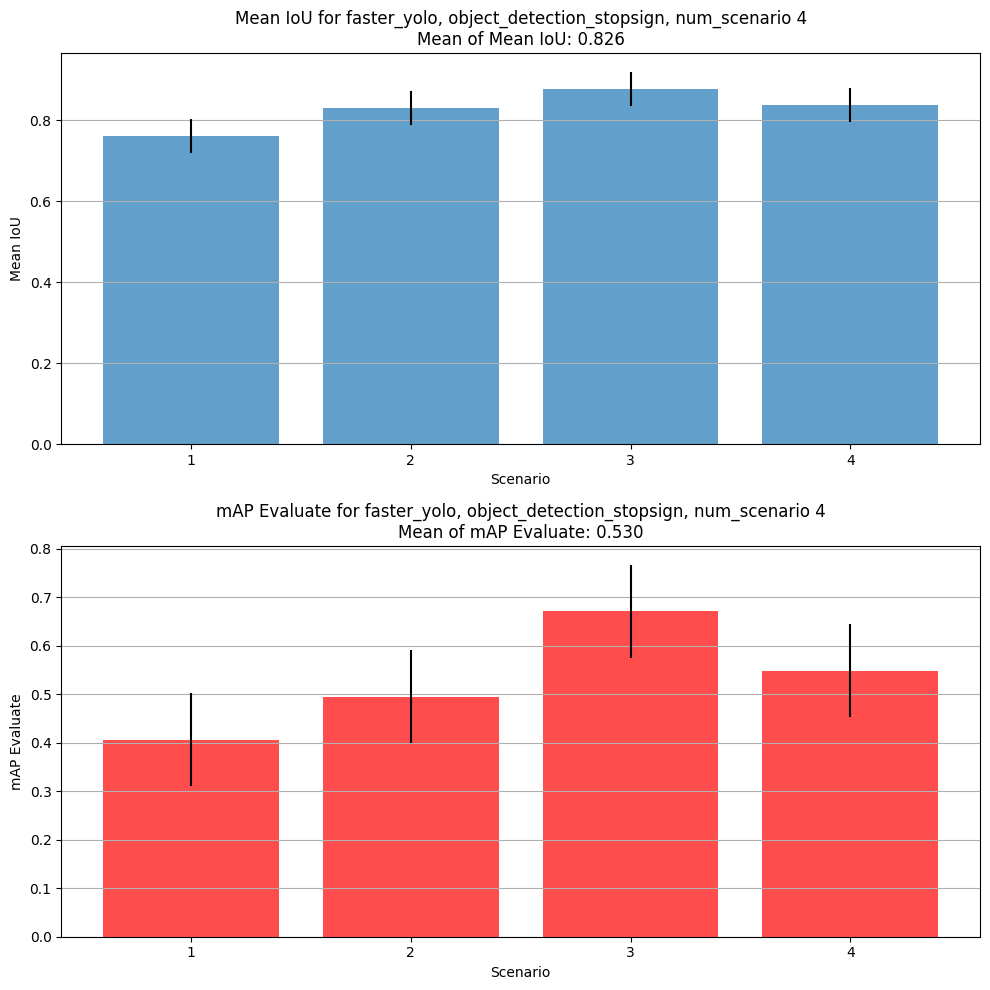

In [40]:
# Plotting the means as horizontal dashed lines
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plotting mean_iou with its mean
axs[0].plot(range(1, len(mean_iou) + 1), mean_iou, marker='o', linestyle='-', color='b')
axs[0].axhline(y=mean_iou_mean, color='g', linestyle='--')
axs[0].set_title('Mean IoU for faster_yolo, object_detection_stopsign, num_scenario 4')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].grid(True)

# Plotting mAP_evaluate with its mean
axs[1].plot(range(1, len(mAP_evaluate) + 1), mAP_evaluate, marker='o', linestyle='-', color='r')
axs[1].axhline(y=mAP_evaluate_mean, color='g', linestyle='--')
axs[1].set_title('mAP Evaluate for faster_yolo, object_detection_stopsign, num_scenario 4')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].grid(True)

plt.tight_layout()
plt.show()

print('--------------------------------')
mean_iou_mean = np.mean(mean_iou)
mean_iou_std = np.std(mean_iou)
mAP_evaluate_mean_yolo_199_45rot = np.mean(mAP_evaluate)
mAP_evaluate_std_yolo_199_45rot  = np.std(mAP_evaluate)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Bar plot for mean_iou with std as error bars
axs[0].bar(range(1, len(mean_iou) + 1), mean_iou, yerr=mean_iou_std, alpha=0.7)
axs[0].set_title(f'Mean IoU for faster_yolo, object_detection_stopsign, num_scenario 4\nMean of Mean IoU: {mean_iou_mean:.3f}')
axs[0].set_xlabel('Scenario')
axs[0].set_ylabel('Mean IoU')
axs[0].set_xticks(range(1, len(mean_iou) + 1))
axs[0].grid(True, axis='y')

# Bar plot for mAP_evaluate with std as error bars
axs[1].bar(range(1, len(mAP_evaluate) + 1), mAP_evaluate, yerr=mAP_evaluate_std_yolo_199_45rot, color='r', alpha=0.7)
axs[1].set_title(f'mAP Evaluate for faster_yolo, object_detection_stopsign, num_scenario 4\nMean of mAP Evaluate: {mAP_evaluate_mean_yolo_199_45rot:.3f}')
axs[1].set_xlabel('Scenario')
axs[1].set_ylabel('mAP Evaluate')
axs[1].set_xticks(range(1, len(mAP_evaluate) + 1))
axs[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

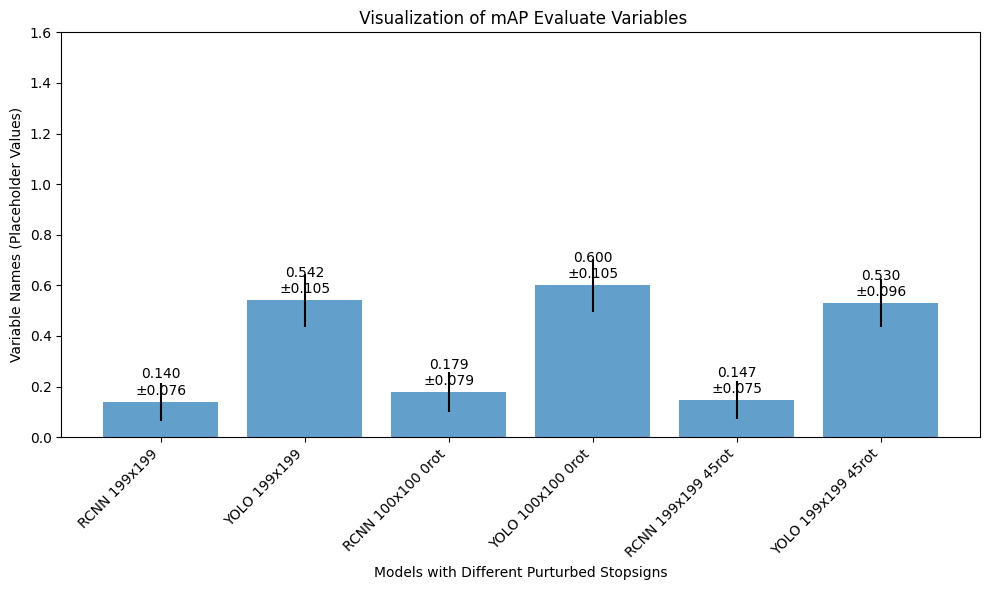

In [43]:
# Scenario names and their corresponding variable names for means and STDs
scenarios = ['RCNN 199x199', 'YOLO 199x199', 'RCNN 100x100 0rot', 'YOLO 100x100 0rot', 'RCNN 199x199 45rot', 'YOLO 199x199 45rot']
mean_vars = [mAP_evaluate_mean_rcnn_199, mAP_evaluate_mean_yolo_199, mAP_evaluate_mean_rcnn_100_0rot, mAP_evaluate_mean_yolo_100_0rot, mAP_evaluate_mean_rcnn_199_45rot, mAP_evaluate_mean_yolo_199_45rot]

std_vars = [mAP_evaluate_std_rcnn_199, mAP_evaluate_std_yolo_199, mAP_evaluate_std_rcnn_100_0rot, mAP_evaluate_std_yolo_100_0rot, mAP_evaluate_std_rcnn_199_45rot, mAP_evaluate_std_yolo_199_45rot]


# Scenario names and their corresponding variable names for means and STDs
scenarios = ['RCNN 199x199', 'YOLO 199x199', 'RCNN 100x100 0rot', 'YOLO 100x100 0rot', 'RCNN 199x199 45rot', 'YOLO 199x199 45rot']
mean_vars = [mAP_evaluate_mean_rcnn_199, mAP_evaluate_mean_yolo_199, mAP_evaluate_mean_rcnn_100_0rot, mAP_evaluate_mean_yolo_100_0rot, mAP_evaluate_mean_rcnn_199_45rot, mAP_evaluate_mean_yolo_199_45rot]
std_vars = [mAP_evaluate_std_rcnn_199, mAP_evaluate_std_yolo_199, mAP_evaluate_std_rcnn_100_0rot, mAP_evaluate_std_yolo_100_0rot, mAP_evaluate_std_rcnn_199_45rot, mAP_evaluate_std_yolo_199_45rot]

# Placeholder numeric values for plotting (these are not used but required for the plot structure)
placeholder_means = mean_vars
placeholder_stds = std_vars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars with placeholder values
bars = ax.bar(scenarios, placeholder_means, yerr=placeholder_stds, alpha=0.7)

# Annotating each bar with its mean and STD variable names
for bar, mean_var, std_var in zip(bars, mean_vars, std_vars):
    height = bar.get_height()
    ax.annotate(f'{mean_var:.3f}\n±{std_var:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xlabel('Models with Different Purturbed Stopsigns')
ax.set_title(' Visualization of mAP Evaluate Variables')
plt.xticks(rotation=45, ha="right")
ax.set_ylabel('Variable Names (Placeholder Values)')
ax.set_ylim(0, max(placeholder_means) + 1)  # Adjust y-limit to accommodate annotations

plt.tight_layout()
plt.show()